<a href="https://colab.research.google.com/github/TaiseiTagami/ResNetArchitectureAiArtDetection/blob/main/ResNetColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the library to mount Google Drive
from google.colab import drive

# Mount the Google Drive at /content/drive
drive.mount('/content/drive')

# Verify by listing the files in the drive
!ls /content/drive/My\ Drive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 2024_Science_Fair			  project-ainet-models
 5-line-ai-data				  Project-AiNet-Models.ipynb
 5-line-ai.ipynb			 'Team TACOMA'
'Colab Notebooks'			 'Untitled document (1).gdoc'
'Copy of ai_detector.ipynb'		 'Untitled document.gdoc'
'Copy of Copy of ai_detector (1).ipynb'  'Untitled spreadsheet.gsheet'
'Copy of Copy of ai_detector.ipynb'	  Videos
 myfile.csv				  WIN_20230822_22_41_18_Pro.mp4


In [ ]:
!pip install plotly
!pip install tensorflow
!pip install keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.6.0
    Uninstalling keras-2.6.0:
      Successfully uninstalled keras-2.6.0


In [ ]:
# Importing Keras
from tensorflow import keras
from tensorflow.python.keras.models import Sequential                          # Neural network model as a sequence of layers.
from tensorflow.python.keras.layers import Conv2D                              # Convolutional layer
from tensorflow.python.keras.layers import MaxPooling2D                        # Max pooling layer
from tensorflow.python.keras.layers import Flatten                             # Layer used to flatten 2D arrays for fully-connected layers.
from tensorflow.python.keras.layers import Dense                               # This layer adds fully-connected layers to the neural network.
from tensorflow.python.keras.layers import Dropout                             # This serves to prevent overfitting by dropping out a random set of activations.
from keras.layers import BatchNormalization                  # This is used to normalize the activations of the neurons.
from tensorflow.python.keras.layers import Activation                          # Layer for activation functions
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint   # Classes used to save weights and stop training when improvements reach a limit
from tensorflow.python.keras.models import load_model                          # This helps us to load trained models
# Preprocessing layers
#from tensorflow.python.keras.layers import Rescaling                           # This layer rescales pixel values

# Importing TensorFlow
import tensorflow as tf

from IPython.display import HTML, display
import time

from collections import defaultdict

import numpy as np

import random

from concurrent.futures import ThreadPoolExecutor

import plotly.subplots as sp
import plotly.graph_objects as go



In [ ]:
# Configuring notebook
seed = 123
paper_color = '#EEF6FF'
bg_color = '#EEF6FF'
#colormap =
#template =

In [ ]:
#@title filteredurls

filtered_urls_illust = ['https://pbs.twimg.com/media/Fr0z0AeaIAEvczx.jpg', 'https://pbs.twimg.com/media/Fr0zzyDagAACJRP.jpg', 'https://pbs.twimg.com/media/Fr0zUUVaQAA61WQ.jpg', 'https://pbs.twimg.com/media/Fr0zoK1aMAETc-B.jpg', 'https://pbs.twimg.com/media/Fr0zdWwaEAAOxzi.png', 'https://pbs.twimg.com/media/Fr0zasAaAAEpEk_.jpg', 'https://pbs.twimg.com/media/Fr0zUuJaQAAq4Ce.jpg', 'https://pbs.twimg.com/media/Fr0zTPHaEAEfVCS.jpg', 'https://pbs.twimg.com/media/Fr0zQsCaEAIzx1F.jpg', 'https://pbs.twimg.com/media/Fr0zQsAaIAAwXLQ.jpg', 'https://pbs.twimg.com/media/Fr0y_t1aYAYH9xB.png', 'https://pbs.twimg.com/media/Fr0zOuCaEAAZmP2.jpg', 'https://pbs.twimg.com/media/Fr0zH6WaYAEt4D4.jpg', 'https://pbs.twimg.com/media/Fr00MGOaQAAu2mx.jpg', 'https://pbs.twimg.com/media/Fr00IGJacAAzTk-.jpg', 'https://pbs.twimg.com/media/Fr00CbeaMAAXQXm.jpg', 'https://pbs.twimg.com/media/Fr0z_lZacAAwggG.jpg', 'https://pbs.twimg.com/media/Fr0z5YQaQAMMdCp.jpg', 'https://pbs.twimg.com/media/Fr0zog9aEAA03ug.jpg', 'https://pbs.twimg.com/media/Fr0zpDZacAAoUOn.jpg', 'https://pbs.twimg.com/media/Fr0xu-EacAA3mOU.jpg', 'https://pbs.twimg.com/media/Fr0zb4_aEAE-4jD.jpg', 'https://pbs.twimg.com/media/Fr0zQaZaMAIJYlk.jpg', 'https://pbs.twimg.com/media/Fr0zKHHaMAALw5u.jpg', 'https://pbs.twimg.com/media/Fr00pp_akAAC6EJ.jpg', 'https://pbs.twimg.com/media/Fr00o_pacAEOF08.jpg', 'https://pbs.twimg.com/media/Fr00nxXaMAAXm66.jpg', 'https://pbs.twimg.com/media/Fr00nxdagAEYJm1.jpg', 'https://pbs.twimg.com/media/Fr00EaZaMAEaaJv.jpg', 'https://pbs.twimg.com/media/Fr00jhyaMAAyqYp.jpg', 'https://pbs.twimg.com/media/Fr00RfaacAE9Xvu.jpg', 'https://pbs.twimg.com/media/Fr00f13aQAE1vq_.jpg', 'https://pbs.twimg.com/media/Fr00ebQaQAIQuma.jpg', 'https://pbs.twimg.com/media/Fr00dU8aMAAvSMF.jpg', 'https://pbs.twimg.com/media/Fr00a9QaYAE5mTR.jpg', 'https://pbs.twimg.com/media/Fr00Y4kaYAEafO3.jpg', 'https://pbs.twimg.com/media/Frz_K7IacAAGaDO.jpg', 'https://pbs.twimg.com/media/Fr0yjGFaEAIMakg.png', 'https://pbs.twimg.com/media/Fr0yiZcaAAY0VWz.png', 'https://pbs.twimg.com/media/Fr00JfcaEAEG5e4.jpg', 'https://pbs.twimg.com/media/Fr00RYQagAwP2hp.jpg', 'https://pbs.twimg.com/media/Fr00Q7faQAAMvQq.jpg', 'https://pbs.twimg.com/media/Fr00OZ4WcAA4Qoo.jpg', 'https://pbs.twimg.com/media/Fr00OeWaEAAB6nY.jpg', 'https://pbs.twimg.com/media/Fr00MkWakAEd-xU.jpg', 'https://pbs.twimg.com/media/Fr00M9paEAIUHIO.jpg', 'https://pbs.twimg.com/media/Fr00KtkaEAEtJ7A.jpg', 'https://pbs.twimg.com/media/Fr0zuzhaIAIJkeg.jpg', 'https://pbs.twimg.com/media/Fr00E9LaUAAbU6D.jpg', 'https://pbs.twimg.com/media/Fr00CcxaIAIFx4u.jpg', 'https://pbs.twimg.com/media/Fr00CcpaEAErH5z.jpg', 'https://pbs.twimg.com/media/Fr00CcuaYAA9SQZ.jpg', 'https://pbs.twimg.com/media/Fr00CnMaEAEc441.jpg', 'https://pbs.twimg.com/media/Fr00CWQaQAA0fZt.jpg', 'https://pbs.twimg.com/media/Fr0z_31aUAIgK8W.jpg', 'https://pbs.twimg.com/media/Fr0z_PxaMAE0yox.jpg', 'https://pbs.twimg.com/media/Fr0z4pSaAAAKYy9.jpg', 'https://pbs.twimg.com/media/Fr0zzkOaYAEaw0v.jpg', 'https://pbs.twimg.com/media/Fr0z0wHagAADoS1.jpg', 'https://pbs.twimg.com/media/Fr0z0wDaYAYEtlp.jpg', 'https://pbs.twimg.com/media/Fr0zvhiaIAAP4Pu.jpg', 'https://pbs.twimg.com/media/Fr0ztXsacAIpSuS.jpg', 'https://pbs.twimg.com/media/Fr0ztXqaMAAoTtD.jpg', 'https://pbs.twimg.com/media/Fr0zrPmaQAAp2Lo.jpg', 'https://pbs.twimg.com/media/Fr00inOacAABFxL.jpg', 'https://pbs.twimg.com/media/Fr00Yz8aQAEcyv5.jpg', 'https://pbs.twimg.com/media/Fr0z7VPXgAIbsis.jpg', 'https://pbs.twimg.com/media/Fr01TkWaIAIX9Pm.jpg', 'https://pbs.twimg.com/media/Fr01S59aAAA5rub.jpg', 'https://pbs.twimg.com/media/Fr01P5FacAAWlrK.jpg', 'https://pbs.twimg.com/media/Fr01CEeaEAc46lW.jpg', 'https://pbs.twimg.com/media/Fr01CEZaMAEav7_.jpg', 'https://pbs.twimg.com/media/Fr00_KTagAEHeCR.jpg', 'https://pbs.twimg.com/media/Fr006wNaEAE2uxy.jpg', 'https://pbs.twimg.com/media/Fr00z7CaYAAr-qR.jpg', 'https://pbs.twimg.com/media/Fr00z69agAA2h2M.jpg', 'https://pbs.twimg.com/media/Fr00z7AaEAE_XqO.jpg', 'https://pbs.twimg.com/media/Fr00z64akAE0o2k.jpg', 'https://pbs.twimg.com/media/Fr00zHmaMAAtqro.jpg', 'https://pbs.twimg.com/media/Fr01N6XakAAKt8R.jpg', 'https://pbs.twimg.com/media/Fr01MWqaYAEewoF.jpg', 'https://pbs.twimg.com/media/Fr00lx-aIAAHzmc.jpg', 'https://pbs.twimg.com/media/Fr01GhQaQAA4Ol6.jpg', 'https://pbs.twimg.com/media/Fr00aIyaUAIqPHM.jpg', 'https://pbs.twimg.com/media/Fr00ZvcaAAEHC5d.jpg', 'https://pbs.twimg.com/media/Fr00ZzuagAEG129.jpg', 'https://pbs.twimg.com/media/Fr01GT7aYAAeC17.jpg', 'https://pbs.twimg.com/media/Fr01GT4akAgYvQR.jpg', 'https://pbs.twimg.com/media/Fr01GT0aEAACv7a.jpg', 'https://pbs.twimg.com/media/Fr000LYaIAA9WiT.jpg', 'https://pbs.twimg.com/media/Fr00zVEaQAAvx84.jpg', 'https://pbs.twimg.com/media/Fr01mIgaUAIphQP.jpg', 'https://pbs.twimg.com/media/Fr01R2BaQAYtT0A.jpg', 'https://pbs.twimg.com/media/Fr01RpjacAUoqLS.jpg', 'https://pbs.twimg.com/media/Fr006BdaIAA8Ze1.jpg', 'https://pbs.twimg.com/media/Fr09ElvaMAUY3ZC.jpg', 'https://pbs.twimg.com/media/Fr08zUtaMAEY-zt.jpg', 'https://pbs.twimg.com/media/Fr08wQ6WAAIJ4A2.jpg', 'https://pbs.twimg.com/media/Fr08q1QakAAtJRO.jpg', 'https://pbs.twimg.com/media/Fr06qAgacAA2EIy.jpg', 'https://pbs.twimg.com/media/Fr08n1nacAMoo6i.jpg', 'https://pbs.twimg.com/media/Fr08V34acAAhGzb.jpg', 'https://pbs.twimg.com/media/Fr08cBuaUAAKVlT.jpg', 'https://pbs.twimg.com/media/Fr08ZKDaYAAwLfU.jpg', 'https://pbs.twimg.com/media/Fr08YDraQAU4vGI.jpg', 'https://pbs.twimg.com/media/Fr08YR7aAAI6wWB.jpg', 'https://pbs.twimg.com/media/Fr08W9tagAEnjlF.jpg', 'https://pbs.twimg.com/media/Fr08UJOaIAA3IiF.jpg', 'https://pbs.twimg.com/media/Fr08UJHaIAAz0IH.jpg', 'https://pbs.twimg.com/media/Fr08TrfaAAEOE08.jpg', 'https://pbs.twimg.com/media/Fr08TrpaQAIRyrc.jpg', 'https://pbs.twimg.com/media/Fr08Sd6aUAEbQdb.jpg', 'https://pbs.twimg.com/media/Fr08PdRaAAcODeT.jpg', 'https://pbs.twimg.com/media/Fr08OK6aEAEjO65.jpg', 'https://pbs.twimg.com/media/Fr08N9OaYAAeN09.jpg', 'https://pbs.twimg.com/media/Fr08M-QaYAA8_hJ.jpg', 'https://pbs.twimg.com/media/Fr08NTXaEAA5GAV.jpg', 'https://pbs.twimg.com/media/Fr08NHhacAAG_JC.jpg', 'https://pbs.twimg.com/media/Fr08MMaaQAADPNx.jpg', 'https://pbs.twimg.com/media/Fr08IVeaQAA8jol.jpg', 'https://pbs.twimg.com/media/Fr08ISPakAIJnNY.jpg', 'https://pbs.twimg.com/media/Fr08CugaUAE5Uri.jpg', 'https://pbs.twimg.com/media/Fr07-7eaIAA0uaS.jpg', 'https://pbs.twimg.com/media/Fr07sQraUAAEPgB.jpg', 'https://pbs.twimg.com/media/Fr078yWakAIc_CQ.jpg', 'https://pbs.twimg.com/media/Fr08p3VagAA_7kB.jpg', 'https://pbs.twimg.com/media/Fr0_mTkaUAcSiSc.jpg', 'https://pbs.twimg.com/media/Fr0_jFjaMAEwddZ.jpg', 'https://pbs.twimg.com/media/Fr0_gv_agAAbiA2.jpg', 'https://pbs.twimg.com/media/Fr0_gw8aEAEK5TK.jpg', 'https://pbs.twimg.com/media/Fr0_cfFaQAEl8U_.jpg', 'https://pbs.twimg.com/media/Fr0_cLoaQAAwFpg.jpg', 'https://pbs.twimg.com/media/Fr0_bszaIAIJfUM.jpg', 'https://pbs.twimg.com/media/Fr0_a_FakAE1oRf.jpg', 'https://pbs.twimg.com/media/Fr0_YltagAU-cH0.jpg', 'https://pbs.twimg.com/media/Fr0_TCjaQAYiB_M.jpg', 'https://pbs.twimg.com/media/Fr0_TG2aAAIa0pe.jpg', 'https://pbs.twimg.com/media/Fr0_RczaQAESIxm.jpg', 'https://pbs.twimg.com/media/Fr0_PqFaQAEm9zp.jpg', 'https://pbs.twimg.com/media/Fr0_OI5akAEgmpQ.jpg', 'https://pbs.twimg.com/media/Fr0_MzgacAAho56.jpg', 'https://pbs.twimg.com/media/Fr0_LvfaAAEK4lg.jpg', 'https://pbs.twimg.com/media/Fr0_LMRaUAUrgV6.jpg', 'https://pbs.twimg.com/media/Fr0_JmBagAMPDvv.jpg', 'https://pbs.twimg.com/media/Fr0_HiTaIAYBWRF.jpg', 'https://pbs.twimg.com/media/Fr0-b4jaUAEdM-f.jpg', 'https://pbs.twimg.com/media/Fr0_GBXaYAIQB0q.jpg', 'https://pbs.twimg.com/media/Fr0-oR3akAA0Xr_.jpg', 'https://pbs.twimg.com/media/Fr0-_LsWIAELYV5.jpg', 'https://pbs.twimg.com/media/Fr0-_L0WIAIkgFN.jpg', 'https://pbs.twimg.com/media/FrxBYSOWcBwmZwT.jpg', 'https://pbs.twimg.com/media/Fr0_Cw_agAA0FvQ.jpg', 'https://pbs.twimg.com/media/Fr0_BFNaEAI9yoA.jpg', 'https://pbs.twimg.com/media/Fr0--7qakAI-Qtk.jpg', 'https://pbs.twimg.com/media/Fr0-9YXakAAmb6C.jpg', 'https://pbs.twimg.com/media/Fr0-9YVaUAAw9zd.jpg', 'https://pbs.twimg.com/media/Fr0-9YSaMAEnCoY.jpg', 'https://pbs.twimg.com/media/Fr0-9YTaIAEXHQG.jpg', 'https://pbs.twimg.com/media/Fr0-8sqaYAIiW7x.jpg', 'https://pbs.twimg.com/media/Fr0-8szakAcFalF.jpg', 'https://pbs.twimg.com/media/Fr0-NmLaMAErJIN.jpg', 'https://pbs.twimg.com/media/Fr0-6ovaEAIOph4.jpg', 'https://pbs.twimg.com/media/Fr0-5ZiakAAlLAE.jpg', 'https://pbs.twimg.com/media/Fr0-3KbaAAIx6De.jpg', 'https://pbs.twimg.com/media/Fr0-5ijaUAIL-_i.jpg', 'https://pbs.twimg.com/media/Fr0-0uDakAAbugn.jpg', 'https://pbs.twimg.com/media/Fr0-0BaacAEChPV.jpg', 'https://pbs.twimg.com/media/Fr0-w1OaEAIha4i.jpg', 'https://pbs.twimg.com/media/Fr0-vtQaAAMMes3.jpg', 'https://pbs.twimg.com/media/Fr0-veXaIAI4S1f.jpg', 'https://pbs.twimg.com/media/Fr0-vIKaAAUm_Wx.jpg', 'https://pbs.twimg.com/media/Fr0-u0naUAE1Bov.jpg', 'https://pbs.twimg.com/media/Fr0-uduaQAM_Cot.jpg', 'https://pbs.twimg.com/media/Fr0-uO7aAAAmtm6.jpg', 'https://pbs.twimg.com/media/Fr0-ucSaMAEsczl.jpg', 'https://pbs.twimg.com/media/Fr0-t2YaAAAiOj9.jpg', 'https://pbs.twimg.com/media/Fr0-tn0acAILWW0.jpg', 'https://pbs.twimg.com/media/Fr0-tLEWcAIZDuq.jpg', 'https://pbs.twimg.com/media/Fr0-rd9WcAQjhM7.jpg', 'https://pbs.twimg.com/media/Fr0-mZkacAEMpYN.jpg', 'https://pbs.twimg.com/media/Fr0-hVZaYAE-NKb.jpg', 'https://pbs.twimg.com/media/Fr0-p3HaEAE6Fcg.jpg', 'https://pbs.twimg.com/media/Fr0-nEtakAAjDFM.jpg', 'https://pbs.twimg.com/media/Fr0-mgUaMAE0nQG.jpg', 'https://pbs.twimg.com/media/Fr0-mgTaYAUzG2I.jpg', 'https://pbs.twimg.com/media/Fr0-mgaaMAA7tYO.jpg', 'https://pbs.twimg.com/media/Fr0-mgXagAMpohE.jpg', 'https://pbs.twimg.com/media/Fr0-mXgaAAI_zWF.jpg', 'https://pbs.twimg.com/media/Fr0-ljhaIAASnpG.jpg', 'https://pbs.twimg.com/media/Fr0-b36aAAEBWRM.png', 'https://pbs.twimg.com/media/Fr0-hk-aEAEcMSZ.jpg', 'https://pbs.twimg.com/media/Fr0-i2naMAUcJgl.jpg', 'https://pbs.twimg.com/media/Fr0-Yb8aUAAozEZ.jpg', 'https://pbs.twimg.com/media/Fr0-h8laMAILeUV.jpg', 'https://pbs.twimg.com/media/Fr0-h9laYAAMHtA.jpg', 'https://pbs.twimg.com/media/Fr0-ht6aQAUq-hN.jpg', 'https://pbs.twimg.com/media/Fr0-hakaIAIDUhy.jpg', 'https://pbs.twimg.com/media/Fr0-e8_agAAOiLO.jpg', 'https://pbs.twimg.com/media/Fr0-YeFaAAAEg1P.jpg', 'https://pbs.twimg.com/media/Fr0-aubaMAA6eN7.jpg', 'https://pbs.twimg.com/media/Fr0-YUMaAAEmAEH.jpg', 'https://pbs.twimg.com/media/Fr0-XRpaEAEJqSG.jpg', 'https://pbs.twimg.com/media/Fr0_bjmX0AMMSjw.jpg', 'https://pbs.twimg.com/media/Fr1AG7naEAAujWP.jpg', 'https://pbs.twimg.com/media/Fr0_8vlagAA6Qgf.jpg', 'https://pbs.twimg.com/media/Fr0_6eUakAEQsy0.jpg', 'https://pbs.twimg.com/media/Fr0_3gnaMAIYDIf.jpg', 'https://pbs.twimg.com/media/Fr0_3K8acAgMj4K.jpg', 'https://pbs.twimg.com/media/Fr0_s07aYAMSmVn.jpg', 'https://pbs.twimg.com/media/Fr0_liaaAAA6W7H.jpg', 'https://pbs.twimg.com/media/Fr0_jYBacAENyCb.jpg', 'https://pbs.twimg.com/media/Fr0_hB3agAIJjFG.jpg', 'https://pbs.twimg.com/media/Fr0_hB1aQAEztDX.jpg', 'https://pbs.twimg.com/media/Fr0_hB0aEAAilQZ.jpg', 'https://pbs.twimg.com/media/Fr0_hB6aIAIa8DQ.jpg', 'https://pbs.twimg.com/media/Fr1Aur6aEAAqNLa.jpg', 'https://pbs.twimg.com/media/Fr1AQCraMAAHl6E.jpg', 'https://pbs.twimg.com/media/Fr1AT5TaAAAm4Gi.jpg', 'https://pbs.twimg.com/media/Fr1AKxjakAA3rkh.jpg', 'https://pbs.twimg.com/media/Fr1AICxacAEzVTC.jpg', 'https://pbs.twimg.com/media/Fr0_nkwagAAgtme.jpg', 'https://pbs.twimg.com/media/Fr0_fCEaAAAcZYW.jpg', 'https://pbs.twimg.com/media/Fr0_c-MacAI3mlL.jpg', 'https://pbs.twimg.com/media/Fr1A8EYaIAAlWwG.jpg', 'https://pbs.twimg.com/media/Fr1A8EbaMAAz37h.jpg', 'https://pbs.twimg.com/media/Fr0_3l6aIAA9cPp.jpg', 'https://pbs.twimg.com/media/Fr1AWt8XgAIgx9q.jpg', 'https://pbs.twimg.com/media/Fr1AWtJXoAAhgN2.jpg', 'https://pbs.twimg.com/media/Fr1AWsiWAAANTQ5.jpg', 'https://pbs.twimg.com/media/Fr1AWsoWcAAPgMa.jpg', 'https://pbs.twimg.com/media/Fr1Asn7agAElfaN.jpg', 'https://pbs.twimg.com/media/Fr1AsfIaQAEh_qk.jpg', 'https://pbs.twimg.com/media/Fr1ATZcX0AMf8PN.jpg', 'https://pbs.twimg.com/media/Fr1AeNSaAAAsbpV.jpg', 'https://pbs.twimg.com/media/Fr1AZ3waIAErNIu.jpg', 'https://pbs.twimg.com/media/Fr1BpPKaYAEXDJp.jpg', 'https://pbs.twimg.com/media/Fr1BTtcagAEVJxc.jpg', 'https://pbs.twimg.com/media/Fr1BDdSacAU1tMw.jpg', 'https://pbs.twimg.com/media/Fr1BOrhakAIPGbY.jpg', 'https://pbs.twimg.com/media/FruK4JnakAAgOxx.jpg', 'https://pbs.twimg.com/media/Fr1BI8baQAAAzWX.jpg', 'https://pbs.twimg.com/media/Fr1A5yYaYAI73ac.jpg', 'https://pbs.twimg.com/media/Fr1BVvdaAAIxSPb.jpg', 'https://pbs.twimg.com/media/Fr1CBySacAADSwn.jpg', 'https://pbs.twimg.com/media/Fr1B4dJacAUeZB6.jpg', 'https://pbs.twimg.com/media/Fr1BsJkaMAcAB_M.jpg', 'https://pbs.twimg.com/media/Fr1Bsi9akAAOgx5.jpg', 'https://pbs.twimg.com/media/Fr1A_rQacAAFZK1.jpg', 'https://pbs.twimg.com/media/Fr1Bo6KaIAApDfP.jpg', 'https://pbs.twimg.com/media/Fr1BgbdaQAEksvF.jpg', 'https://pbs.twimg.com/media/Fr1BQzCXoAUpeSU.jpg', 'https://pbs.twimg.com/media/Fr1BN9RXsAA_z3c.jpg', 'https://pbs.twimg.com/media/Fr1BN4AaQAA0P5c.jpg', 'https://pbs.twimg.com/media/Fr1CPoEaAAkWsxY.jpg', 'https://pbs.twimg.com/media/Fr1CXQIaQAUzm3I.jpg', 'https://pbs.twimg.com/media/Fr1CQhYacAAK67d.jpg', 'https://pbs.twimg.com/media/Fr1CI-TaUAEaYMD.png', 'https://pbs.twimg.com/media/Fr1CHLoagAIv1AV.jpg', 'https://pbs.twimg.com/media/Fr1B3KQaUAAnGrI.jpg', 'https://pbs.twimg.com/media/Fr1B5ygaYAE_0RV.jpg', 'https://pbs.twimg.com/media/Fr1BvElakAE99wt.jpg', 'https://pbs.twimg.com/media/Fr1BqnAaQAoFErF.jpg', 'https://pbs.twimg.com/media/Fr1BkJiWIAAdOae.jpg', 'https://pbs.twimg.com/media/Fr1BbPCaQAA01CA.jpg', 'https://pbs.twimg.com/media/Fr1BS5bacAAOxJt.jpg', 'https://pbs.twimg.com/media/Fr1C67caUAYwZ1I.jpg', 'https://pbs.twimg.com/media/Fr1Cy1JagAMnuGz.jpg', 'https://pbs.twimg.com/media/Fr1CudKacAEi817.jpg', 'https://pbs.twimg.com/media/Fr1CprfaMAAil8z.jpg', 'https://pbs.twimg.com/media/Fr1CptVaUAAP89E.jpg', 'https://pbs.twimg.com/media/Fr1ClCjaIAARDeC.jpg', 'https://pbs.twimg.com/media/Fr1CeogaMAEqt0F.jpg', 'https://pbs.twimg.com/media/Fr1Cb-ZakAAW41u.jpg', 'https://pbs.twimg.com/media/Fr1CYBvaMAA1dPM.jpg', 'https://pbs.twimg.com/media/Fr1CAK-aQAEeZPw.jpg', 'https://pbs.twimg.com/media/Fr1CP_RakAEivl3.jpg', 'https://pbs.twimg.com/media/Fr1CP8taMAEwb_n.jpg', 'https://pbs.twimg.com/media/Fr1CP9GaUAEFi6L.jpg', 'https://pbs.twimg.com/media/Fr1COj6aMAAylWp.jpg', 'https://pbs.twimg.com/media/Fr1CG0naEAIsyWo.jpg', 'https://pbs.twimg.com/media/Fr1DPjKaIAUAf7e.jpg', 'https://pbs.twimg.com/media/Fr1DM-QaYAAPCXt.jpg', 'https://pbs.twimg.com/media/Fr1DJEWaUAEV_Qz.jpg', 'https://pbs.twimg.com/media/Fr1DHRxacAEvr0A.jpg', 'https://pbs.twimg.com/media/Fr1DDO4aUAEbYhm.jpg', 'https://pbs.twimg.com/media/Fr1C-uuaUAAA9B_.jpg', 'https://pbs.twimg.com/media/Fr1CsppXoAAJVOt.jpg', 'https://pbs.twimg.com/media/Fr1CxRpaYAoNw0U.jpg', 'https://pbs.twimg.com/media/Fr1ECMhaMAAYp3I.jpg', 'https://pbs.twimg.com/media/Fr1EB9iaMAENP74.jpg', 'https://pbs.twimg.com/media/Fr1EBtDaMAA9sFI.jpg', 'https://pbs.twimg.com/media/Fr1EBd9agAIgNyM.jpg', 'https://pbs.twimg.com/media/Fr1D6yNaQAATZFt.jpg', 'https://pbs.twimg.com/media/Fr1DqEwaIAAQACN.jpg', 'https://pbs.twimg.com/media/Fr1Dn6RaMAAr1TZ.jpg', 'https://pbs.twimg.com/media/Fr1DoccaUAEw9Gr.jpg', 'https://pbs.twimg.com/media/Fr1DohJakAE_eyY.jpg', 'https://pbs.twimg.com/media/Fr1Dn7zXsAER7xi.jpg', 'https://pbs.twimg.com/media/Fr1DnzeaYAENYX3.jpg', 'https://pbs.twimg.com/media/Fr1DkU5aEAARlt1.jpg', 'https://pbs.twimg.com/media/Fr1Dj6faIAIfIph.jpg', 'https://pbs.twimg.com/media/Fr1DTW0aYAAyGzW.jpg', 'https://pbs.twimg.com/media/Fr1DTJ1aAAAG2Ub.jpg', 'https://pbs.twimg.com/media/Fr1DTJyaUAIcYjQ.jpg', 'https://pbs.twimg.com/media/Fr1DTJuaIAE70Ll.jpg', 'https://pbs.twimg.com/media/Fr1DRbaaIAQrncE.jpg', 'https://pbs.twimg.com/media/Fr1DJnraUAEcNVy.jpg', 'https://pbs.twimg.com/media/Fr1C_nIaQAEWWtl.jpg', 'https://pbs.twimg.com/media/Fr1D_GHaAAEjjC2.jpg', 'https://pbs.twimg.com/media/Fr1D7znaYAAa7Dc.jpg', 'https://pbs.twimg.com/media/Fr1D2P4akAIBGQZ.jpg', 'https://pbs.twimg.com/media/Fr1DMlVaMAEIW-0.jpg', 'https://pbs.twimg.com/media/Fr1Ex6aaYAIDBFl.jpg', 'https://pbs.twimg.com/media/Fr1EtALaMAECilH.jpg', 'https://pbs.twimg.com/media/Fr1EswCacAE-fTi.jpg', 'https://pbs.twimg.com/media/Fr1EsVjaUAEjRUL.jpg', 'https://pbs.twimg.com/media/Fr1EfVracAEW5PS.jpg', 'https://pbs.twimg.com/media/Fr1EfVtaAAUEglW.jpg', 'https://pbs.twimg.com/media/Fr1BOoYaMAUtUIK.jpg', 'https://pbs.twimg.com/media/Fr1EWieWYAIISaG.jpg', 'https://pbs.twimg.com/media/Fr1EUuQaMAIzBI7.jpg', 'https://pbs.twimg.com/media/Fr1EQUmaQAQRRBR.jpg', 'https://pbs.twimg.com/media/Fr1EBQ2aQAAG7KA.jpg', 'https://pbs.twimg.com/media/Fr1D-xGaAAEDHdV.jpg', 'https://pbs.twimg.com/media/Fr1D9QWWwAExJlv.png', 'https://pbs.twimg.com/media/Fr1Byv1WwAAMyxr.png', 'https://pbs.twimg.com/media/Fr1D98BaEAEGax4.jpg', 'https://pbs.twimg.com/media/Fr1D6LlaYAEY7xD.jpg', 'https://pbs.twimg.com/media/Fr1D3TBaUAIEMxO.jpg', 'https://pbs.twimg.com/media/Fr1D3EtaUAIAIcf.jpg', 'https://pbs.twimg.com/media/Fr1D24DacAAGamO.jpg', 'https://pbs.twimg.com/media/Fr1D2uKaYAA97II.jpg', 'https://pbs.twimg.com/media/Fr1D2Z1aAAAbl5L.jpg', 'https://pbs.twimg.com/media/Fr1DxQ1aYAEgeX0.jpg', 'https://pbs.twimg.com/media/Fr1CVMlWIAEdcKk.png', 'https://pbs.twimg.com/media/Fr1DwPsaYAACWPW.jpg', 'https://pbs.twimg.com/media/Fr1DvVvaAAUvrea.jpg', 'https://pbs.twimg.com/media/Fr1DfwzaIAMR90R.jpg', 'https://pbs.twimg.com/media/Fr1DrG7aQAA0ynz.jpg', 'https://pbs.twimg.com/media/Fr1DrF7acAEp7Wg.jpg', 'https://pbs.twimg.com/media/Fr1DpcKaUAAA6ML.jpg', 'https://pbs.twimg.com/media/Fr1FZwTaAAQdzXA.jpg', 'https://pbs.twimg.com/media/Fr1FExAaIAADTky.jpg', 'https://pbs.twimg.com/media/Fr1FAXQaIAAHVlM.jpg', 'https://pbs.twimg.com/media/Fr1E7jraAAAQVqB.jpg', 'https://pbs.twimg.com/media/Fr1E5bsakAUI_VQ.jpg', 'https://pbs.twimg.com/media/Fr1E34XaUAMSoSx.jpg', 'https://pbs.twimg.com/media/Fr1E34LacAA5VV4.jpg', 'https://pbs.twimg.com/media/Fr1EvhTaIAQrzqx.jpg', 'https://pbs.twimg.com/media/Fr1EvTzaEAAIKtK.jpg', 'https://pbs.twimg.com/media/Fr1EuswakAIAT3K.jpg', 'https://pbs.twimg.com/media/Fr1ErFZaEAA4tEi.jpg', 'https://pbs.twimg.com/media/Fr1EjbVacAI-xVy.jpg', 'https://pbs.twimg.com/media/Fr1EgYsaMAw-2q9.jpg', 'https://pbs.twimg.com/media/Fr1Edj4aAAEMHpK.jpg', 'https://pbs.twimg.com/media/Fr1BFAdWYAE20c6.png', 'https://pbs.twimg.com/media/Fr1EW7gXwAMzAqG.jpg', 'https://pbs.twimg.com/media/Fr1EV0ZaIAA0OLy.jpg', 'https://pbs.twimg.com/media/Fr1ERlxaMAENiKR.jpg', 'https://pbs.twimg.com/media/Fr1EP9-aIAEli0Z.jpg', 'https://pbs.twimg.com/media/Fr1EPpqaIAES8xU.jpg', 'https://pbs.twimg.com/media/Fr1EPTJaEAETfr4.jpg', 'https://pbs.twimg.com/media/Fr1EINSaQAE6SSb.jpg', 'https://pbs.twimg.com/media/Fr1EFrEaMAEXmXj.jpg', 'https://pbs.twimg.com/media/Fr1EFrRaAAAK-4I.jpg', 'https://pbs.twimg.com/media/Fr1EFrBaMAA9CoL.jpg', 'https://pbs.twimg.com/media/Fr1EFq8aIAA-z-U.jpg', 'https://pbs.twimg.com/media/Fr1D36caMAAE8rh.jpg', 'https://pbs.twimg.com/media/Fr1FkagagAIRY0w.jpg', 'https://pbs.twimg.com/media/Fr1FiWuaEAE67t2.jpg', 'https://pbs.twimg.com/media/Fr1FY3QaAAE2OX1.jpg', 'https://pbs.twimg.com/media/Fr1FEJNaIAA6RV5.jpg', 'https://pbs.twimg.com/media/Fr1E_ScaMAQ-_Dn.jpg', 'https://pbs.twimg.com/media/Fr1FThRagAE4MhS.jpg', 'https://pbs.twimg.com/media/Fr1E9FLacAEuehs.jpg', 'https://pbs.twimg.com/media/Fr1E3TQaEAABgCr.jpg', 'https://pbs.twimg.com/media/Fr1EhmhaAAIPr_c.jpg', 'https://pbs.twimg.com/media/Fr1F_BMakAIb_4-.jpg', 'https://pbs.twimg.com/media/Fr1F9EaaMAM5XcA.jpg', 'https://pbs.twimg.com/media/Fr1F3OtaIAElJNZ.jpg', 'https://pbs.twimg.com/media/Fr1FzT7aMAEhH9P.jpg', 'https://pbs.twimg.com/media/Fr1FzSiaMAECyJX.jpg', 'https://pbs.twimg.com/media/FrO-Iz_acAA4qqJ.jpg', 'https://pbs.twimg.com/media/Fr1FqhCagAIUUXK.jpg', 'https://pbs.twimg.com/media/Fr1FZ07agAEgBxj.jpg', 'https://pbs.twimg.com/media/Fr1FZ03aEAImujA.jpg', 'https://pbs.twimg.com/media/Fr1FZ05aIAABvGn.jpg', 'https://pbs.twimg.com/media/Fr1FZ1PakAEgaCq.jpg', 'https://pbs.twimg.com/media/Fr1FYlwakAE6Iuq.jpg', 'https://pbs.twimg.com/media/Fr1FYFeagAIfU5L.jpg', 'https://pbs.twimg.com/media/Fr1FXHoacAMlpsY.jpg', 'https://pbs.twimg.com/media/Fr1FXHwagAA-VkK.jpg', 'https://pbs.twimg.com/media/Fr1FXHragAMKw2U.jpg', 'https://pbs.twimg.com/media/Fr1FXHraMAAJsYi.jpg', 'https://pbs.twimg.com/media/Fr1FTDGaIAA0ByE.jpg', 'https://pbs.twimg.com/media/Fr1FShwaUAAoLP3.jpg', 'https://pbs.twimg.com/media/Fr1FBHvakAIDt83.jpg', 'https://pbs.twimg.com/media/Fr1FJ0IakAIPO0Q.jpg', 'https://pbs.twimg.com/media/Fr1FIJMaMAEXg0B.jpg', 'https://pbs.twimg.com/media/Fr1FGRxaQAEewIU.jpg', 'https://pbs.twimg.com/media/Fr1FGStacAAMJY6.jpg', 'https://pbs.twimg.com/media/Fr1FGRtaYAA2ddB.jpg', 'https://pbs.twimg.com/media/Fr1FGR3agAAaCHa.jpg', 'https://pbs.twimg.com/media/Fr1E9MAaIAE03jo.jpg', 'https://pbs.twimg.com/media/Fr1E2O0aIAAf3t2.jpg', 'https://pbs.twimg.com/media/Fr1GteoXoAE8PUc.jpg', 'https://pbs.twimg.com/media/Fr1GjsMaMAAXpOS.jpg', 'https://pbs.twimg.com/media/Fr1GdAZakAIZUiA.jpg', 'https://pbs.twimg.com/media/Fr1GYI1aIAAkLwO.jpg', 'https://pbs.twimg.com/media/Fr1GX66akAAwtIe.jpg', 'https://pbs.twimg.com/media/Fr1GW_KakAEMjyz.png', 'https://pbs.twimg.com/media/Fr1GUlUacAIx0jl.jpg', 'https://pbs.twimg.com/media/Fr1GTF6XwAAEsRW.jpg', 'https://pbs.twimg.com/media/Fr1GS10aQAEGK2T.jpg', 'https://pbs.twimg.com/media/Fr1GSxJaQAESz-I.jpg', 'https://pbs.twimg.com/media/Fr1GP8OacAAgDH_.jpg', 'https://pbs.twimg.com/media/Fr1GIL1aMAAhZKE.jpg', 'https://pbs.twimg.com/media/Fr1GHSwakAA3K4p.jpg', 'https://pbs.twimg.com/media/Fr1GC8iaAAMIUrn.jpg', 'https://pbs.twimg.com/media/Fr1F5OqaEAEW_4H.jpg', 'https://pbs.twimg.com/media/Fr1F5DKacAE9l8J.jpg', 'https://pbs.twimg.com/media/Fr1F25TaQAcXt2u.jpg', 'https://pbs.twimg.com/media/Fr1F25PaQAMh8al.jpg', 'https://pbs.twimg.com/media/Fr1F25UakAEv_jC.jpg', 'https://pbs.twimg.com/media/Fr1F242aYAAYFMD.jpg', 'https://pbs.twimg.com/media/Fr1F2Q4acAYIuIR.jpg', 'https://pbs.twimg.com/media/Fr1E9NqaQAIH_-8.jpg', 'https://pbs.twimg.com/media/Fr1F0JcacAI5xsm.jpg', 'https://pbs.twimg.com/media/Fr1FqFeaQAE_Ad2.jpg', 'https://pbs.twimg.com/media/Fr1G0Z5XoAAYnMK.jpg', 'https://pbs.twimg.com/media/Fr1HCUXaUAAjm9e.jpg', 'https://pbs.twimg.com/media/Fr1HBgdaYAEnu_H.jpg', 'https://pbs.twimg.com/media/Fr1G3pGagAMPrtE.png', 'https://pbs.twimg.com/media/Fr1GlN8acAkXx3J.jpg', 'https://pbs.twimg.com/media/Fr1G2kTaAAEAQwD.jpg', 'https://pbs.twimg.com/media/Fr1FKwVagAE8FSN.jpg', 'https://pbs.twimg.com/media/Fr1G2RVaUAEzU9c.jpg', 'https://pbs.twimg.com/media/Fr1G0V0aIAQLef8.jpg', 'https://pbs.twimg.com/media/Fr1GyEGakAE2I6F.jpg', 'https://pbs.twimg.com/media/Fr1GslEacAAnion.jpg', 'https://pbs.twimg.com/media/Fr1GiQhaUAA3e0B.jpg', 'https://pbs.twimg.com/media/Fr1GaztaMAAUL2e.jpg', 'https://pbs.twimg.com/media/Fr1GQgOakAAGoYP.jpg', 'https://pbs.twimg.com/media/Fr1FVSDaUAAZeb9.jpg', 'https://pbs.twimg.com/media/Fr1HWYuaAAIeAAj.jpg', 'https://pbs.twimg.com/media/Fr1HWaraUAY51S8.jpg', 'https://pbs.twimg.com/media/Fr1HSDoaMAUBwXm.jpg', 'https://pbs.twimg.com/media/Fr1HSrHaAAAiHSx.jpg', 'https://pbs.twimg.com/media/Fr1HPMgagAEyefL.jpg', 'https://pbs.twimg.com/media/Fr1HM2jaQAE7psb.jpg', 'https://pbs.twimg.com/media/Fr1HMaqaUAAdVTQ.jpg', 'https://pbs.twimg.com/media/Fr1HManagAEEK55.jpg', 'https://pbs.twimg.com/media/Fr1HHxiakAMfFiC.jpg', 'https://pbs.twimg.com/media/Fr1HHpraMAANZxk.jpg', 'https://pbs.twimg.com/media/Fr1HEzrakAAm-KW.jpg', 'https://pbs.twimg.com/media/Fr1G7VXacAEQArD.jpg', 'https://pbs.twimg.com/media/Fr1IH9faAAI7-rp.jpg', 'https://pbs.twimg.com/media/Fr1H21uXsAA55n9.jpg', 'https://pbs.twimg.com/media/Fr1Hx0eaEAE03GV.jpg', 'https://pbs.twimg.com/media/Fr1HwrKakAUhXMm.jpg', 'https://pbs.twimg.com/media/Fr1HwvgaIAAAHaT.jpg', 'https://pbs.twimg.com/media/Fr1Hvl6aEAILCu0.jpg', 'https://pbs.twimg.com/media/Fr1HvmAaUAQzRkc.jpg', 'https://pbs.twimg.com/media/Fr1HsfjagAE_BiV.jpg', 'https://pbs.twimg.com/media/Fr1HsCdaMAAA-rV.jpg', 'https://pbs.twimg.com/media/Fr1HsCSaEAUMHAj.jpg', 'https://pbs.twimg.com/media/Fr1HsCSaAAAxCTt.jpg', 'https://pbs.twimg.com/media/Fr1Hr7CakAEizKL.jpg', 'https://pbs.twimg.com/media/Fr1Hq-AaAAAvaLb.jpg', 'https://pbs.twimg.com/media/Fr1HnolaAAAxAUV.jpg', 'https://pbs.twimg.com/media/Fr1Hkj_akAAdggl.jpg', 'https://pbs.twimg.com/media/Fr1HhHvacAA0KD9.jpg', 'https://pbs.twimg.com/media/Fr1HecEaQAAtgZ5.jpg', 'https://pbs.twimg.com/media/Fr1Hcv3aUAEh7Ev.jpg', 'https://pbs.twimg.com/media/Fr1HXHvaYAAY2IY.jpg', 'https://pbs.twimg.com/media/Fr1HXH4aYAE5Kkh.jpg', 'https://pbs.twimg.com/media/Fr1HXHvaQAIq73_.jpg', 'https://pbs.twimg.com/media/Fr1HXHtaIAYJU8k.jpg', 'https://pbs.twimg.com/media/Fr1HV7xaEAEGVKh.jpg', 'https://pbs.twimg.com/media/Fr1HN6CaEAERhki.jpg', 'https://pbs.twimg.com/media/Fr1HN6EacAA0ku6.jpg', 'https://pbs.twimg.com/media/Fr1HThIaIAA3hmL.jpg', 'https://pbs.twimg.com/media/Fr1HO2NaYAMNclw.jpg', 'https://pbs.twimg.com/media/Fr1HOt1akAAeCvl.jpg', 'https://pbs.twimg.com/media/Fr1IVaGakAACtGI.jpg', 'https://pbs.twimg.com/media/Fr1H8jPaMAokVrN.jpg', 'https://pbs.twimg.com/media/Fr1H2XyaAAYYJy3.jpg', 'https://pbs.twimg.com/media/Fr1H1KCaQAAjAIQ.jpg', 'https://pbs.twimg.com/media/Fr1H0PcaUAAcZ7D.png', 'https://pbs.twimg.com/media/Fr1HyW5acAA2VVd.jpg', 'https://pbs.twimg.com/media/Fr1Hw2oacAAWMxy.jpg', 'https://pbs.twimg.com/media/Fr1JCwKaEAAWNnN.jpg', 'https://pbs.twimg.com/media/Fr1IR9ZaUAAQzeE.jpg', 'https://pbs.twimg.com/media/Fr1IyANaUAEm23G.jpg', 'https://pbs.twimg.com/media/Fr1IgW-aEAIaFQe.jpg', 'https://pbs.twimg.com/media/Fr1IoQGagAAFY6e.jpg', 'https://pbs.twimg.com/media/Fr1ImegaUAAVFCr.jpg', 'https://pbs.twimg.com/media/Fr1ImDqagAIr0Uc.jpg', 'https://pbs.twimg.com/media/Fr1IBbdaYAA7HSt.jpg', 'https://pbs.twimg.com/media/Fr1Id4facAA4wZ6.jpg', 'https://pbs.twimg.com/media/Fr1Ias3aYAI4VbL.jpg', 'https://pbs.twimg.com/media/Fr1IaAlaEAUOvOn.jpg', 'https://pbs.twimg.com/media/Fr1IaezWYAAIZt1.jpg', 'https://pbs.twimg.com/media/Fr1IaewWwAMzOsq.jpg', 'https://pbs.twimg.com/media/Fr1IaevXwAQXBHV.jpg', 'https://pbs.twimg.com/media/Fr1IaevWYAIznSJ.jpg', 'https://pbs.twimg.com/media/Fr1IPQ6aUAIlLi5.jpg', 'https://pbs.twimg.com/media/Fr1IKWhaYAAKX0I.jpg', 'https://pbs.twimg.com/media/Fr1IF45aUAAyl9K.jpg', 'https://pbs.twimg.com/media/Fr1IF44agAE7qub.jpg', 'https://pbs.twimg.com/media/Fr1IDDWaQAMgDfz.jpg', 'https://pbs.twimg.com/media/Fr1H7KEaQAA23Ap.jpg', 'https://pbs.twimg.com/media/Fr1JkIragAIn3jV.jpg', 'https://pbs.twimg.com/media/Fr1JORraMAA_J1l.jpg', 'https://pbs.twimg.com/media/Fr1JLIBaMAAT86V.jpg', 'https://pbs.twimg.com/media/Fr1JDyIaUAE7eq2.jpg', 'https://pbs.twimg.com/media/Fr1JC8maUAAxuCS.jpg', 'https://pbs.twimg.com/media/Fr1IqBnaMAAKaob.jpg', 'https://pbs.twimg.com/media/Fr1Iu-waUAAfwui.jpg', 'https://pbs.twimg.com/media/Fr1I7qMagAEJMru.jpg', 'https://pbs.twimg.com/media/Fr0tK8baAAAP_6d.jpg', 'https://pbs.twimg.com/media/Fr1IkFDWYAEG_5f.jpg', 'https://pbs.twimg.com/media/Fr1IWN1aEAMGBz2.jpg', 'https://pbs.twimg.com/media/Fr1JlRjaYAABTwC.jpg', 'https://pbs.twimg.com/media/Fr1Ji79aEAA5iQu.jpg', 'https://pbs.twimg.com/media/Fr1J39DaEAMJjxs.jpg', 'https://pbs.twimg.com/media/Fr1J3VsX0AAcKD3.jpg', 'https://pbs.twimg.com/media/Fr1J0IdacAI-fw3.jpg', 'https://pbs.twimg.com/media/Fr1JxFWaMAAWKU4.jpg', 'https://pbs.twimg.com/media/Fr1Jqq3aUAAstP0.jpg', 'https://pbs.twimg.com/media/Fr1Joy7akAA98_a.jpg', 'https://pbs.twimg.com/media/Fr1JhDLakAASF5L.jpg', 'https://pbs.twimg.com/media/Fr1Jb34aMAAIbo3.jpg', 'https://pbs.twimg.com/media/Fr1KjgaaIAEVgYJ.jpg', 'https://pbs.twimg.com/media/Fr1KMSBagAEgaDv.jpg', 'https://pbs.twimg.com/media/Fr1KMR-aYAA8eYg.jpg', 'https://pbs.twimg.com/media/Fr1KMR1aQAE9bw1.jpg', 'https://pbs.twimg.com/media/Fr1KGixaMAEskAz.jpg', 'https://pbs.twimg.com/media/Fr1KChkacAA1AKx.jpg', 'https://pbs.twimg.com/media/Fr1J_DRagAEdJY3.jpg', 'https://pbs.twimg.com/media/Fr1J-rzWwAQGJNN.jpg', 'https://pbs.twimg.com/media/Fr1J-cmXgAEMfME.jpg', 'https://pbs.twimg.com/media/Fr1JZlQWwAA905F.jpg', 'https://pbs.twimg.com/media/Fr1J6lzagAEr6nb.jpg', 'https://pbs.twimg.com/media/Fr1J58YagAQ-4JQ.jpg', 'https://pbs.twimg.com/media/Fr1J1eHacAAkj5Z.jpg', 'https://pbs.twimg.com/media/Fr1JT_5akAA4vtF.jpg', 'https://pbs.twimg.com/media/Fr1JS0saAAM87sy.jpg', 'https://pbs.twimg.com/media/Fr1H1a7WcAEjkbj.jpg', 'https://pbs.twimg.com/media/Fr1JAwZaMAAUByA.jpg', 'https://pbs.twimg.com/media/Fr1KnALacAAGDj9.jpg', 'https://pbs.twimg.com/media/Fr1KSo_aAAAvG4t.jpg', 'https://pbs.twimg.com/media/Fr1KStHaQAE_MA0.jpg', 'https://pbs.twimg.com/media/Fr1KO_5aUAE3aPx.jpg', 'https://pbs.twimg.com/media/Fr1KO_3aEAAjEjC.jpg', 'https://pbs.twimg.com/media/Fr1JsviaEAERqpd.jpg', 'https://pbs.twimg.com/media/Fr1JwtOaQAIJp7g.jpg', 'https://pbs.twimg.com/media/Fr1LPCpaIAA3v5n.jpg', 'https://pbs.twimg.com/media/Fr1LPuAaEAA3FiS.jpg', 'https://pbs.twimg.com/media/Fr1LMaOacAAqbQq.jpg', 'https://pbs.twimg.com/media/Fr1LCBmXoAALiN3.jpg', 'https://pbs.twimg.com/media/Fr1LCBlWYAAZU84.jpg', 'https://pbs.twimg.com/media/Fr1LCBnXgAEPM4r.jpg', 'https://pbs.twimg.com/media/Fr1LAs0aAAA-SUW.jpg', 'https://pbs.twimg.com/media/Fr1LAsxaUAAo4sS.jpg', 'https://pbs.twimg.com/media/Fr1LAs1acAASgbc.jpg', 'https://pbs.twimg.com/media/Fr1LAsxagAA26Pf.jpg', 'https://pbs.twimg.com/media/Fr1K_2waMAMuAFt.jpg', 'https://pbs.twimg.com/media/Fr1K_hKaAAYdeNw.jpg', 'https://pbs.twimg.com/media/Fr1K-bFaAAEFtQw.jpg', 'https://pbs.twimg.com/media/Fr1K6bmaIAAc8Zb.jpg', 'https://pbs.twimg.com/media/Fr1KrPLaIAEzCR-.jpg', 'https://pbs.twimg.com/media/Fr1KspraIAAbav7.jpg', 'https://pbs.twimg.com/media/Fr1KjCBaIAA6BF3.jpg', 'https://pbs.twimg.com/media/Fr1KXMSaEAI-LWL.jpg', 'https://pbs.twimg.com/media/Fr1KXDAaQAAti1-.jpg', 'https://pbs.twimg.com/media/Fr1KNiiacAIy_YC.jpg', 'https://pbs.twimg.com/media/Fr1LpRKaAAIB5d6.jpg', 'https://pbs.twimg.com/media/Fr1LldLakAAV5jX.jpg', 'https://pbs.twimg.com/media/Fr1LeUBaEAMOSfJ.jpg', 'https://pbs.twimg.com/media/Fr1LTnpacAIvuue.jpg', 'https://pbs.twimg.com/media/Fr1LRYqaYAMUOjL.jpg', 'https://pbs.twimg.com/media/Fr1LRG1acAMq0MK.jpg', 'https://pbs.twimg.com/media/Fr1LMgyacAAV9R_.jpg', 'https://pbs.twimg.com/media/Fr1JOnRaUAAq-xo.jpg', 'https://pbs.twimg.com/media/Fr1LJ9yaYAcgUau.jpg', 'https://pbs.twimg.com/media/Fr1KrcgaUAQALuq.jpg', 'https://pbs.twimg.com/media/Fr1KmodaAAASWO0.jpg', 'https://pbs.twimg.com/media/Fr1KmVuacAI_f1A.jpg', 'https://pbs.twimg.com/media/Fr1Kl0BWcAQfnYt.jpg', 'https://pbs.twimg.com/media/Fr1MNKuaYAAwQbv.jpg', 'https://pbs.twimg.com/media/Fr1MMyKaQAAnL5U.jpg', 'https://pbs.twimg.com/media/Fr1MK20akAEN8fH.jpg', 'https://pbs.twimg.com/media/Fr1MKqOacAAkWPB.jpg', 'https://pbs.twimg.com/media/Fr1MKqLaMAI7Xd2.jpg', 'https://pbs.twimg.com/media/Fr1LltJaUAAheku.jpg', 'https://pbs.twimg.com/media/Fr1Lls6agAAV1fm.jpg', 'https://pbs.twimg.com/media/Fr1MJEfaUAErvbm.jpg', 'https://pbs.twimg.com/media/Fr1MIR8aIAAypZW.jpg', 'https://pbs.twimg.com/media/Fr1MGBsaYAA8_oH.jpg', 'https://pbs.twimg.com/media/Fr1L_K2aQAAFz5r.jpg', 'https://pbs.twimg.com/media/Fr1L-cMakAIcWzI.jpg', 'https://pbs.twimg.com/media/Fr1L94tacAIYLaJ.jpg', 'https://pbs.twimg.com/media/Fr1L9MJaUAA46_A.jpg', 'https://pbs.twimg.com/media/Fr1L8-qakAEszP-.jpg', 'https://pbs.twimg.com/media/Fr1L58NaUAAcYk3.jpg', 'https://pbs.twimg.com/media/Fr1L7FHaAAAsBw1.jpg', 'https://pbs.twimg.com/media/Fr1L5epaAAAl_bR.jpg', 'https://pbs.twimg.com/media/Fr1L3H9aYAEwZFd.jpg', 'https://pbs.twimg.com/media/Fr1L0qSakAAiUEm.jpg', 'https://pbs.twimg.com/media/Fr1LzhCaEAYK1NS.jpg', 'https://pbs.twimg.com/media/Fr1LntSaEAA6vRb.jpg', 'https://pbs.twimg.com/media/Fr1H4JNaYAg46AU.jpg', 'https://pbs.twimg.com/media/Fr1Ldd7aUAAq1je.jpg', 'https://pbs.twimg.com/media/Fr1M1rKakAUFRol.jpg', 'https://pbs.twimg.com/media/Fr1MlExaAAIS-6m.jpg', 'https://pbs.twimg.com/media/Fr1Mr1SagAIKYwR.jpg', 'https://pbs.twimg.com/media/Fr1MLZFX0AAabxS.jpg', 'https://pbs.twimg.com/media/Fr1MdcRaYAIKlC8.jpg', 'https://pbs.twimg.com/media/Fr1MboaaIAAd9q8.jpg', 'https://pbs.twimg.com/media/Fr1MbIDaQAUFxkG.jpg', 'https://pbs.twimg.com/media/Fr1MKKnaUAAF14E.jpg', 'https://pbs.twimg.com/media/Fr1MVYSakAE_Nu0.jpg', 'https://pbs.twimg.com/media/Fr1MPmhaEAAW6BO.jpg', 'https://pbs.twimg.com/media/Fr1MFQuagAAWGd1.jpg', 'https://pbs.twimg.com/media/Fr1L-u-agAEVPHs.jpg', 'https://pbs.twimg.com/media/Fr1MC_6aEAElfKz.png', 'https://pbs.twimg.com/media/Fr1MCuFaAAE80Qx.jpg', 'https://pbs.twimg.com/media/Fr1L-4jakAEIeNa.jpg', 'https://pbs.twimg.com/media/Fr1L4XBXgAEjlJe.jpg', 'https://pbs.twimg.com/media/Fr1LrWpagAAxhU1.jpg', 'https://pbs.twimg.com/media/Fr1LrA8agAEbfcM.jpg', 'https://pbs.twimg.com/media/Fr1LpwAaUAA8W_U.jpg', 'https://pbs.twimg.com/media/Fr1ND9_aIAABG6v.jpg', 'https://pbs.twimg.com/media/Fr1M0MoagAA4j7R.jpg', 'https://pbs.twimg.com/media/Fr1MqLMacAUGsTw.jpg', 'https://pbs.twimg.com/media/Fr1MEidaUAA7tIq.jpg', 'https://pbs.twimg.com/media/Fr1MZWeagAANmYD.jpg', 'https://pbs.twimg.com/media/Fr1NkYhakAIOKZ8.jpg', 'https://pbs.twimg.com/media/Fr1NdTMaUAELr_2.jpg', 'https://pbs.twimg.com/media/Fr1OA6jagAAw-XJ.jpg', 'https://pbs.twimg.com/media/Fr1N88DaUAAV1av.jpg', 'https://pbs.twimg.com/media/Fr1N2lJaYAAcJ1J.jpg', 'https://pbs.twimg.com/media/Fr1MzgAaMAACa9t.jpg', 'https://pbs.twimg.com/media/Fr1Nx5zaUAIL7qk.jpg', 'https://pbs.twimg.com/media/Fr1NnD6aAAsbWjv.jpg', 'https://pbs.twimg.com/media/Fr1NNyHakAIOhSz.jpg', 'https://pbs.twimg.com/media/Fr1NKcbaUAA4BTW.jpg', 'https://pbs.twimg.com/media/Fr1NaEyagAEZVAD.jpg', 'https://pbs.twimg.com/media/Fr1NUwAaYAICd1b.jpg', 'https://pbs.twimg.com/media/Fr1NVFwacAE72OE.jpg', 'https://pbs.twimg.com/media/Fr1NWAqaEAEhjKg.jpg', 'https://pbs.twimg.com/media/Fr1NUdqagAAUA9-.jpg', 'https://pbs.twimg.com/media/Fr1NR5magAEMRai.jpg', 'https://pbs.twimg.com/media/Fr1NR5paEAcgDTN.jpg', 'https://pbs.twimg.com/media/Fr1NH4eaEAEcSXY.jpg', 'https://pbs.twimg.com/media/Fr1M8fwaYAA5Q1M.jpg', 'https://pbs.twimg.com/media/Fr1Oq4kaYAA4dGR.jpg', 'https://pbs.twimg.com/media/Fr1OoB5aUAAQNr1.jpg', 'https://pbs.twimg.com/media/Fr1OZF-aUAUROvN.jpg', 'https://pbs.twimg.com/media/Fr1NX9DaMAEvefw.jpg', 'https://pbs.twimg.com/media/Fr1NVzdacAIH1V2.jpg', 'https://pbs.twimg.com/media/Fr1NSnQaAAYV8cE.jpg', 'https://pbs.twimg.com/media/Fr1NWoBaUAAHPkl.jpg', 'https://pbs.twimg.com/media/Fr1NSY1aEAI4EXw.jpg', 'https://pbs.twimg.com/media/Fr1O8graQAAWIEe.jpg', 'https://pbs.twimg.com/media/Fr1NfxHacAQSF-7.jpg', 'https://pbs.twimg.com/media/Fr1OuV7aAAAlEzb.jpg', 'https://pbs.twimg.com/media/Fr1OtWxaAAM7khU.jpg', 'https://pbs.twimg.com/media/Fr1OoQaagAMJu78.jpg', 'https://pbs.twimg.com/media/Fr1OnQVacAAoMac.jpg', 'https://pbs.twimg.com/media/Fr1Npu2aUAYQ_HE.jpg', 'https://pbs.twimg.com/media/Fr1N-OHaEAAdtx6.jpg', 'https://pbs.twimg.com/media/Fr1N4CbaUAEzehc.jpg', 'https://pbs.twimg.com/media/Fr1NhbmaEAAn18B.jpg', 'https://pbs.twimg.com/media/Fr1PXC1aMAAQRVS.jpg', 'https://pbs.twimg.com/media/Fr1PR66aAAAbwHx.jpg', 'https://pbs.twimg.com/media/Fr1PR7PagAEOzlt.jpg', 'https://pbs.twimg.com/media/Fr1OZo5aMAEzzr0.jpg', 'https://pbs.twimg.com/media/Fr1PIC_WYAA2TRd.jpg', 'https://pbs.twimg.com/media/Fr1PHxvXwAANwr7.jpg', 'https://pbs.twimg.com/media/Fr1PHgiWYAM6nqp.jpg', 'https://pbs.twimg.com/media/Fr1PEkgWcAEokw7.jpg', 'https://pbs.twimg.com/media/Fr1OnA1XoAEZhL2.jpg', 'https://pbs.twimg.com/media/Fr1OkGGaYAAsY8F.jpg', 'https://pbs.twimg.com/media/Fr1OgWpaEAAHqcl.jpg', 'https://pbs.twimg.com/media/Fr1OOpyaYAMqFW8.jpg', 'https://pbs.twimg.com/media/Fr1PGFzaMAEEGM0.jpg', 'https://pbs.twimg.com/media/Fr1OFQ7aYAYYvWd.jpg', 'https://pbs.twimg.com/media/Fr1QGc5XgAEJQyl.jpg', 'https://pbs.twimg.com/media/Fr1QG8tagAEiYo0.jpg', 'https://pbs.twimg.com/media/Fr1Pp6taQAE7745.jpg', 'https://pbs.twimg.com/media/Fr1PkOoagAIM8Mi.jpg', 'https://pbs.twimg.com/media/Fr1PcnyaMAE8KpO.jpg', 'https://pbs.twimg.com/media/Fr1Qy2naQAUcgiF.jpg', 'https://pbs.twimg.com/media/Fr1QxGYaUAMWcp3.jpg', 'https://pbs.twimg.com/media/Fr1QxGWaAAIRdTG.jpg', 'https://pbs.twimg.com/media/Fr1QLx9WcAAYQbQ.jpg', 'https://pbs.twimg.com/media/Fr1QrjEaUAMDs9R.jpg', 'https://pbs.twimg.com/media/Fr1QqCfaAAATRzP.jpg', 'https://pbs.twimg.com/media/Fr1QZcnaMAELfqy.jpg', 'https://pbs.twimg.com/media/Fr1QWN1aEAERt1D.jpg', 'https://pbs.twimg.com/media/Fr1QBmtaIAEaYxa.jpg', 'https://pbs.twimg.com/media/Fr1QBPiakAALD9a.jpg', 'https://pbs.twimg.com/media/Fr1P7xyaIAEI22J.jpg', 'https://pbs.twimg.com/media/Fr1PzcMaMAEg06j.jpg', 'https://pbs.twimg.com/media/Fr1PvtnX0AMNHQj.jpg', 'https://pbs.twimg.com/media/Fr1Pva2WAAcJZ9w.jpg', 'https://pbs.twimg.com/media/Fr1PvHSWcAAw1Ce.jpg', 'https://pbs.twimg.com/media/Fr1PVSwaEAUNFyL.jpg', 'https://pbs.twimg.com/media/Fr1PVS2agAAXNEr.jpg', 'https://pbs.twimg.com/media/Fr1PVS0aQAYgEDR.jpg', 'https://pbs.twimg.com/media/Fr1PVSzaIAAOF3f.jpg', 'https://pbs.twimg.com/media/Fr1PH3RagAI-o06.jpg', 'https://pbs.twimg.com/media/Fr1RZJMakAUlQPi.jpg', 'https://pbs.twimg.com/media/Fr1Q8DUWwAE58bU.jpg', 'https://pbs.twimg.com/media/Fr1Qi4iakAERrdz.jpg', 'https://pbs.twimg.com/media/Fr1QdgCaEAU6X-h.jpg', 'https://pbs.twimg.com/media/Fr1QZhSaMAI58Ym.jpg', 'https://pbs.twimg.com/media/Fr1Rv6NakAI5BEy.jpg', 'https://pbs.twimg.com/media/Fr1RohDaYAIFxmL.jpg', 'https://pbs.twimg.com/media/Fr1Rn3waEAAGj0n.jpg', 'https://pbs.twimg.com/media/Fr1RZ90aQAEXMZC.jpg', 'https://pbs.twimg.com/media/Fr1RXxpaUAMQo_X.jpg', 'https://pbs.twimg.com/media/Fr1RXaTakAUt7Fk.jpg', 'https://pbs.twimg.com/media/Fr1RSLYagAEVagL.jpg', 'https://pbs.twimg.com/media/Fr1RPHeaQAUZAh_.jpg', 'https://pbs.twimg.com/media/Fr1RO5YaUAEY2SG.jpg', 'https://pbs.twimg.com/media/Fr1RO9iagAAzbRu.jpg', 'https://pbs.twimg.com/media/Fr1RMJFaIAERkTC.jpg', 'https://pbs.twimg.com/media/Fr1RKVuaMAE5GSH.jpg', 'https://pbs.twimg.com/media/Fr1RCx7acAAVAE7.jpg', 'https://pbs.twimg.com/media/Fr1RCfwakAACIEM.jpg', 'https://pbs.twimg.com/media/Fr1RCN_akAAMOu1.jpg', 'https://pbs.twimg.com/media/Fr1RAftaYAEHBBO.jpg', 'https://pbs.twimg.com/media/Fr1RAfsacAA2iS9.jpg', 'https://pbs.twimg.com/media/Fr1QAlSaEAEb_w2.jpg', 'https://pbs.twimg.com/media/Fr1QAlQaYAQSir7.jpg', 'https://pbs.twimg.com/media/Fr1Q5_HaYAIVpBe.jpg', 'https://pbs.twimg.com/media/Fr1Q6MKaQAAW9hO.jpg', 'https://pbs.twimg.com/media/Fr1Q4gVaUAAP47-.jpg', 'https://pbs.twimg.com/media/Fr1Q1oSaIAEsIVF.jpg', 'https://pbs.twimg.com/media/Fr1QqSkagAA-G1g.jpg', 'https://pbs.twimg.com/media/Fr1QiioaYAAx6Jf.jpg', 'https://pbs.twimg.com/media/Fr1QgqsaQAAw_6V.jpg', 'https://pbs.twimg.com/media/Fr1QgXEaEAARIdV.jpg', 'https://pbs.twimg.com/media/Fr1QeiRaIAE1gAH.jpg', 'https://pbs.twimg.com/media/Fr1QeiNaUAAIXxr.jpg', 'https://pbs.twimg.com/media/Fr1QcCRaUAAlVYH.jpg', 'https://pbs.twimg.com/media/Fr1QXLjaAAAOXvr.jpg', 'https://pbs.twimg.com/media/Fr1QYphaUAEsG5F.jpg', 'https://pbs.twimg.com/media/Fr1QJMcaUAE4r1Q.jpg', 'https://pbs.twimg.com/media/Fr1SIJqaUAAq3bJ.jpg', 'https://pbs.twimg.com/media/Fr1RXKtaMAY_AMT.png', 'https://pbs.twimg.com/media/Fr0gIynakAAgqSr.jpg', 'https://pbs.twimg.com/media/Fryfq0FXgAEVTR7.jpg', 'https://pbs.twimg.com/media/Fp3ENvhakAIwi7v.jpg', 'https://pbs.twimg.com/media/Fr0xqZuacAERevF.jpg', 'https://pbs.twimg.com/media/Fr1Q805aYAAEyol.jpg', 'https://pbs.twimg.com/media/Fr1SAN_aIAIUHJz.jpg', 'https://pbs.twimg.com/media/Fr1R7uvaUAAGODt.png', 'https://pbs.twimg.com/media/Fr1Rx1jagAA-6qV.jpg', 'https://pbs.twimg.com/media/Fr1Rj81agAI4Hf8.jpg', 'https://pbs.twimg.com/media/Fr1Q71EakAAuy0C.jpg', 'https://pbs.twimg.com/media/Fr1QyCZaIAAR2yf.jpg', 'https://pbs.twimg.com/media/Fr1Qs0TakAAxLBN.jpg', 'https://pbs.twimg.com/media/Fr1QkHGaUAED7s4.jpg', 'https://pbs.twimg.com/media/Fr1SvAtakAAoyQM.jpg', 'https://pbs.twimg.com/media/Fr1SsXjaIAAMA6d.png', 'https://pbs.twimg.com/media/Fr1SqezagAEQFqZ.png', 'https://pbs.twimg.com/media/Fr1SWS8acAAyzwz.jpg', 'https://pbs.twimg.com/media/Fr1R4yVX0AE4hoY.jpg', 'https://pbs.twimg.com/media/Fr1SLmXaAAAxOX5.jpg', 'https://pbs.twimg.com/media/Fr1SNlcaMAESkMq.jpg', 'https://pbs.twimg.com/media/Fr1R8Z6aAAEZA87.jpg', 'https://pbs.twimg.com/media/Fr1R8LWaMAELSJR.jpg', 'https://pbs.twimg.com/media/Fr1R67TaUAA_A-B.jpg', 'https://pbs.twimg.com/media/Fr1R5uiaIAYPT6r.jpg', 'https://pbs.twimg.com/media/Fr1R6K2aIAEe3o0.jpg', 'https://pbs.twimg.com/media/Fr1QPxyaQAAkmHa.jpg', 'https://pbs.twimg.com/media/Fr1RstQagAA9aOJ.jpg', 'https://pbs.twimg.com/media/Fr1RpYzaQAAlsUA.jpg', 'https://pbs.twimg.com/media/Fr1RhOcaMAA63Em.jpg', 'https://pbs.twimg.com/media/Fr1RaZLacAIiDo7.jpg', 'https://pbs.twimg.com/media/Fr1TVQdaQAIi_Rt.jpg', 'https://pbs.twimg.com/media/Fr0y6hKaIAEanLc.jpg', 'https://pbs.twimg.com/media/Fr1TDi8aYAQmk-p.jpg', 'https://pbs.twimg.com/media/Fr1S62bakAAkk7Y.jpg', 'https://pbs.twimg.com/media/Fr1S4GbaEAI9wGq.jpg', 'https://pbs.twimg.com/media/Fr1S3GtXsAAB-V9.jpg', 'https://pbs.twimg.com/media/Fr1SupwaEAAUizT.jpg', 'https://pbs.twimg.com/media/Fr1SZmracAEczU5.jpg', 'https://pbs.twimg.com/media/Fr1STtxacAEu5zx.jpg', 'https://pbs.twimg.com/media/Fr1TtVnaUAAuYG9.jpg', 'https://pbs.twimg.com/media/Fr1TsbLakAAqgn5.jpg', 'https://pbs.twimg.com/media/Fr1TQ6OaYAEhHBy.jpg', 'https://pbs.twimg.com/media/Fr1TG08aIAQctBS.jpg', 'https://pbs.twimg.com/media/Fr1S6miaIAEF5-0.jpg', 'https://pbs.twimg.com/media/Fr1Sr2LaEAExjzy.jpg', 'https://pbs.twimg.com/media/Fr1Sk7QaAAALtOG.jpg', 'https://pbs.twimg.com/media/Fr1UGRdXsAEtFui.jpg', 'https://pbs.twimg.com/media/Fr1T0XHaUAIPbSF.jpg', 'https://pbs.twimg.com/media/Fr1TZ_LaEAAMXQM.jpg', 'https://pbs.twimg.com/media/Fr1Tc_SaAAIWyUQ.jpg', 'https://pbs.twimg.com/media/Fr1TYIJaAAEVyd3.jpg', 'https://pbs.twimg.com/media/Fr1TEE2aQAExpue.jpg', 'https://pbs.twimg.com/media/Fr1SwwUaUAAApXf.jpg', 'https://pbs.twimg.com/media/Fr1Upf0acAEWZun.jpg', 'https://pbs.twimg.com/media/Fr1UWXKaUAIhtV7.png', 'https://pbs.twimg.com/media/Fr1T2U5aEAA4Lyt.jpg', 'https://pbs.twimg.com/media/Fr1TdUmaAAA8dZ5.jpg', 'https://pbs.twimg.com/media/Fr1U8xVaEAAGriv.jpg', 'https://pbs.twimg.com/media/Fr1Ux1yagAEp7DM.jpg', 'https://pbs.twimg.com/media/Fr1Uwy9aAAIOHGW.jpg', 'https://pbs.twimg.com/media/Fr1UoJTacAE28Qg.jpg', 'https://pbs.twimg.com/media/Fr1Uhc1aMAE6-Pg.jpg', 'https://pbs.twimg.com/media/Fr1UbVjaYAAcfXl.jpg', 'https://pbs.twimg.com/media/Fr1UbVsaAAAETqh.jpg', 'https://pbs.twimg.com/media/Fr1UbVjaEAQ1Pti.jpg', 'https://pbs.twimg.com/media/Fr1UbVlaMAAt1GY.jpg', 'https://pbs.twimg.com/media/Fr1UYBZaQAIhC2V.jpg', 'https://pbs.twimg.com/media/Fr1UPQMagAEAQ3g.jpg', 'https://pbs.twimg.com/media/Fr1UA5uaUAEXhcq.jpg', 'https://pbs.twimg.com/media/Fr1T3bqacAAZZBv.jpg', 'https://pbs.twimg.com/media/Fr1T3bpaAAAYV_q.jpg', 'https://pbs.twimg.com/media/Fr1T-F6acAIUr8G.jpg', 'https://pbs.twimg.com/media/Fr1T8JAaIAUenXQ.jpg', 'https://pbs.twimg.com/media/Fr1TrYNagAA_Nl2.jpg', 'https://pbs.twimg.com/media/Fr1Tc4_aQAAxa2v.jpg', 'https://pbs.twimg.com/media/Fr1Tn_eaAAAheHu.jpg', 'https://pbs.twimg.com/media/Fr1Tn_faQAMZjkL.jpg', 'https://pbs.twimg.com/media/Fr1UvmYacAAvX3i.jpg', 'https://pbs.twimg.com/media/Fr1VGiKagAASycg.png', 'https://pbs.twimg.com/media/Fr1VGhuacAEy8cW.png', 'https://pbs.twimg.com/media/Fr1VERPaYAYRU0s.png', 'https://pbs.twimg.com/media/Fr1VJAtagAAcoM_.png', 'https://pbs.twimg.com/media/Fr1UuyPXgAEfYHc.png', 'https://pbs.twimg.com/media/Fr1VvbHaYAAZ5qA.jpg', 'https://pbs.twimg.com/media/Fr1VtTaaMAAN5JK.jpg', 'https://pbs.twimg.com/media/Fr1Vr6WaAAIPftI.jpg', 'https://pbs.twimg.com/media/Fr1VlNTaEAAOe9e.jpg', 'https://pbs.twimg.com/media/Fr1U2hCaIAAao3z.jpg', 'https://pbs.twimg.com/media/Fr1VXwzaAAIvHTR.jpg', 'https://pbs.twimg.com/media/Fr1VU8EagAMUCVG.jpg', 'https://pbs.twimg.com/media/Fr1VPgLaMAAyjn8.jpg', 'https://pbs.twimg.com/media/Fr1M9guaUAQ55E4.jpg', 'https://pbs.twimg.com/media/Fr1T2GEWIAU7HGB.jpg', 'https://pbs.twimg.com/media/Fr1TsuyWwAAROuu.jpg', 'https://pbs.twimg.com/media/Fr1TozbXsAA8Lna.jpg', 'https://pbs.twimg.com/media/Fr1Wa_mWwAA1GKj.jpg', 'https://pbs.twimg.com/media/Fr1V-LkakAInff4.jpg', 'https://pbs.twimg.com/media/Fr1Vzl4aQAIAoUK.jpg', 'https://pbs.twimg.com/media/Fr1Vup5aAAELNoB.jpg', 'https://pbs.twimg.com/media/Fr1Vhb7aQAEsWLL.jpg', 'https://pbs.twimg.com/media/Fr1VQXZaEAEKCXH.jpg', 'https://pbs.twimg.com/media/Fr1VJKpaQAIi8Ds.jpg', 'https://pbs.twimg.com/media/Fr1UWpuaMAAR7sy.jpg', 'https://pbs.twimg.com/media/Fr1Wj9raQAIAj44.jpg', 'https://pbs.twimg.com/media/Fr1WlyZaEAECGsy.jpg', 'https://pbs.twimg.com/media/Fr1WJVOWIAIA9pQ.jpg', 'https://pbs.twimg.com/media/Fr1VmJeacAAbS3s.jpg', 'https://pbs.twimg.com/media/Fr1VVn8agAIkz-u.jpg', 'https://pbs.twimg.com/media/Fr1VQheaIAEbsPP.jpg', 'https://pbs.twimg.com/media/Fr1VQhdaMAEtkK_.jpg', 'https://pbs.twimg.com/media/Fr1VQhgaYAAB61P.jpg', 'https://pbs.twimg.com/media/Fr1VHACaEAAZgPK.jpg', 'https://pbs.twimg.com/media/Fr1U32oaIAET_pE.jpg', 'https://pbs.twimg.com/media/Fr1XM5PaMAE1Hhh.jpg', 'https://pbs.twimg.com/media/Fr1XIMIakAADi2q.jpg', 'https://pbs.twimg.com/media/Fr1XCMQacAILp6W.jpg', 'https://pbs.twimg.com/media/Fr1W-VhaIAIrOVW.jpg', 'https://pbs.twimg.com/media/Fr1W-7paAAE-YgI.jpg', 'https://pbs.twimg.com/media/Fr1W5hiaUAUPbg8.jpg', 'https://pbs.twimg.com/media/Fr1WonYaUAQPzw9.jpg', 'https://pbs.twimg.com/media/Fr1WXwpWYAEthZw.jpg', 'https://pbs.twimg.com/media/Fr1WMF7XsAACyK2.jpg', 'https://pbs.twimg.com/media/Fr1WBP8X0AYqYSj.jpg', 'https://pbs.twimg.com/media/Fr1V78UXsAcKzXj.jpg', 'https://pbs.twimg.com/media/Fr1WgAXaYAAecT5.jpg', 'https://pbs.twimg.com/media/Fr1WahsaIAEWYav.jpg', 'https://pbs.twimg.com/media/Fr1WWH3aQAMth7F.jpg', 'https://pbs.twimg.com/media/Fr1WRd1aQAAf9Of.jpg', 'https://pbs.twimg.com/media/Fr1WOQfakAQbuwO.jpg', 'https://pbs.twimg.com/media/Fr1V_P0aYAEkvRl.jpg', 'https://pbs.twimg.com/media/Fr1VssUaQAI1Y8q.jpg', 'https://pbs.twimg.com/media/Fr1V09LaEAUy4Jp.jpg', 'https://pbs.twimg.com/media/Fr1V087aMAIXc7C.jpg', 'https://pbs.twimg.com/media/Fr1Vt-8agAUjLL4.jpg', 'https://pbs.twimg.com/media/Fr1VUgBacAAsWXk.jpg', 'https://pbs.twimg.com/media/Fr1VPBQaAAAbpPJ.jpg', 'https://pbs.twimg.com/media/Fr1X7xnaIAE7cpT.jpg', 'https://pbs.twimg.com/media/Fr1XdvWWwAMeviR.jpg', 'https://pbs.twimg.com/media/Fr1XPH7aMAA_UIe.jpg', 'https://pbs.twimg.com/media/Fr1XJjfaMAAV81F.jpg', 'https://pbs.twimg.com/media/Fr1XCOUaQAAHMqy.png', 'https://pbs.twimg.com/media/Fr1W5FCaUAAL0Ag.jpg', 'https://pbs.twimg.com/media/Fr1WXvvaYAAceXR.jpg', 'https://pbs.twimg.com/media/Fr1VlurakAIUjts.jpg', 'https://pbs.twimg.com/media/Fr1YKVzaYAEgxzQ.jpg', 'https://pbs.twimg.com/media/Fr1YBYyaEAEMh5v.jpg', 'https://pbs.twimg.com/media/Fr1YBA6aYAETPHa.jpg', 'https://pbs.twimg.com/media/Fr1X7NdakAEJVYG.jpg', 'https://pbs.twimg.com/media/Fr1X6FfaAAAv5rs.jpg', 'https://pbs.twimg.com/media/Fr1X5D8agAAn5WL.jpg', 'https://pbs.twimg.com/media/Fr1X4WiakAAP3zW.jpg', 'https://pbs.twimg.com/media/FqmyLwxaYAAsF-6.jpg', 'https://pbs.twimg.com/media/Fr1X16KaUAAjreT.jpg', 'https://pbs.twimg.com/media/Fr1XmsWaYAAs4et.jpg', 'https://pbs.twimg.com/media/Fr1XZMRaAAANzKL.jpg', 'https://pbs.twimg.com/media/Fr1XeoHakAIqnJM.jpg', 'https://pbs.twimg.com/media/Fr1WyXyXwAI0TJc.jpg', 'https://pbs.twimg.com/media/Fr1YkwQaEAE2WhI.jpg', 'https://pbs.twimg.com/media/Fr1YkwCaYAENQ5v.jpg', 'https://pbs.twimg.com/media/Fr1YkwEaUAACGJF.jpg', 'https://pbs.twimg.com/media/Fr1YkwCaIAEpJ3T.jpg', 'https://pbs.twimg.com/media/Fr1Yb-9acAMJ7v3.jpg', 'https://pbs.twimg.com/media/Fr1YVW9aEAApk65.jpg', 'https://pbs.twimg.com/media/Fr1YNIeaMAMWwnv.jpg', 'https://pbs.twimg.com/media/Fr1YIBEaIAAxGTt.jpg', 'https://pbs.twimg.com/media/Fr1YF8taAAAqUVx.jpg', 'https://pbs.twimg.com/media/Fr1X-UpaUAIKOZt.jpg', 'https://pbs.twimg.com/media/Fr1XGDtagAA94Yc.jpg', 'https://pbs.twimg.com/media/Fr1W65BaQAA4unp.jpg', 'https://pbs.twimg.com/media/Fr1W3ZCacAI5gAC.jpg', 'https://pbs.twimg.com/media/Fr1W2lzaQAA7rof.jpg', 'https://pbs.twimg.com/media/Fr1W2EpaAAMxtsa.jpg', 'https://pbs.twimg.com/media/Fr1YxLnaYAAMn0C.jpg', 'https://pbs.twimg.com/media/Fr1Yn5rXgAEZUsS.jpg', 'https://pbs.twimg.com/media/Fr1YZuoaQAQ_6kH.jpg', 'https://pbs.twimg.com/media/Fr1YXEFagAAuwHM.jpg', 'https://pbs.twimg.com/media/Fr1YJueaIAIx2WL.jpg', 'https://pbs.twimg.com/media/Fr1YJi6aIAAZudK.jpg', 'https://pbs.twimg.com/media/Fr1ZrutaAAA5GPv.jpg', 'https://pbs.twimg.com/media/Fr1ZcRragAA-bG0.jpg', 'https://pbs.twimg.com/media/Fr1Zo2SaMAE0BBO.jpg', 'https://pbs.twimg.com/media/Fr1ZmmbaQAEdpcr.jpg', 'https://pbs.twimg.com/media/Fr1ZYC9aIAEceZL.jpg', 'https://pbs.twimg.com/media/Fr1ZYDCakAELM3m.jpg', 'https://pbs.twimg.com/media/Fr1ZYDBaEAI5C1X.jpg', 'https://pbs.twimg.com/media/Fr1ZYDBaAAAPO3Z.jpg', 'https://pbs.twimg.com/media/Fr1ZRlxaUAADBWm.jpg', 'https://pbs.twimg.com/media/Fr1ZE4zacAA2mAo.jpg', 'https://pbs.twimg.com/media/Fr1XeCPXgAM_i6-.jpg', 'https://pbs.twimg.com/media/Fr1XSA9aQAABOth.jpg', 'https://pbs.twimg.com/media/Fr1XP0JakAEuekX.jpg', 'https://pbs.twimg.com/media/Fr1aFP-aEAApNl4.jpg', 'https://pbs.twimg.com/media/Fr1ZtORagAIvHa_.jpg', 'https://pbs.twimg.com/media/Fr1Ys6RaQAIgTWl.jpg', 'https://pbs.twimg.com/media/Fr1aqw_aQAAwXtf.jpg', 'https://pbs.twimg.com/media/Fr1ZYDRaAAMuicu.jpg', 'https://pbs.twimg.com/media/Fr1ZibjaEAE07pM.jpg', 'https://pbs.twimg.com/media/Fr1Y9RUaEAE3IO4.jpg', 'https://pbs.twimg.com/media/Fr1awLPagAI34Qg.jpg', 'https://pbs.twimg.com/media/Fr1av5KaEAAAjUG.jpg', 'https://pbs.twimg.com/media/Fr1at-IaQAArJ36.jpg', 'https://pbs.twimg.com/media/Fr1aNZwakAAm3g_.jpg', 'https://pbs.twimg.com/media/Fr1aM7FaUAAHTNa.jpg', 'https://pbs.twimg.com/media/Fr1aMpQakAApdYu.jpg', 'https://pbs.twimg.com/media/Fr1aML1aQAAhKyR.jpg', 'https://pbs.twimg.com/media/Fr1aL05aAAAeTXQ.jpg', 'https://pbs.twimg.com/media/Fr1aK5MaUAE7uPu.jpg', 'https://pbs.twimg.com/media/Fr1bmmsaIAEim59.jpg', 'https://pbs.twimg.com/media/Fr1ceDHagAEPlYv.jpg', 'https://pbs.twimg.com/media/Fr1cWOvaMAUYyY0.jpg', 'https://pbs.twimg.com/media/Fr1cUEQaQAE9fGR.jpg', 'https://pbs.twimg.com/media/Fr1cBvBacAMInPt.jpg', 'https://pbs.twimg.com/media/Fr1cArlaYAUsjSM.jpg', 'https://pbs.twimg.com/media/Fr1br3raYAAdih8.jpg', 'https://pbs.twimg.com/media/Fr1br3saYAEdRL6.jpg', 'https://pbs.twimg.com/media/Fr1br3uaMAIMJCr.jpg', 'https://pbs.twimg.com/media/Fr1br3qaYAA39ct.jpg', 'https://pbs.twimg.com/media/Fr1bk0lXgAAB8G_.jpg', 'https://pbs.twimg.com/media/Fr1dd_uaIAMqWFU.jpg', 'https://pbs.twimg.com/media/Fr1cjHFWAAI2fsO.jpg', 'https://pbs.twimg.com/media/Fr1cjHIWIAERoNf.jpg', 'https://pbs.twimg.com/media/Fr1d2bnaMAAAKuD.jpg', 'https://pbs.twimg.com/media/Fr1cq3nakAAj10B.jpg', 'https://pbs.twimg.com/media/Fr1dqekaMAEqwQh.jpg', 'https://pbs.twimg.com/media/Fr1dp2daMAAXLyB.jpg', 'https://pbs.twimg.com/media/Fr1dknSaMAA-DZQ.jpg', 'https://pbs.twimg.com/media/Fr1dLznaEAI8K53.jpg', 'https://pbs.twimg.com/media/Fr1dcPPaMAAss4U.jpg', 'https://pbs.twimg.com/media/Fr1drRBaEAA1l7t.jpg', 'https://pbs.twimg.com/media/Fr1dLDHaYAE7nub.jpg', 'https://pbs.twimg.com/media/Fr1dH-AacAAxVwv.jpg', 'https://pbs.twimg.com/media/Fr1dHO5aAAA5aAM.jpg', 'https://pbs.twimg.com/media/Fr1dGqzaUAAUqVi.jpg', 'https://pbs.twimg.com/media/Fr1cahRaMAAuKHb.jpg', 'https://pbs.twimg.com/media/Fr1eL2ZXgAAKtuk.jpg', 'https://pbs.twimg.com/media/Fr1eAlgX0AE2pN5.jpg', 'https://pbs.twimg.com/media/Fr1eGuLaUAEn0B2.jpg', 'https://pbs.twimg.com/media/Fr1eW5CaQAMSTD4.jpg', 'https://pbs.twimg.com/media/Fr1eW47acAE79vV.jpg', 'https://pbs.twimg.com/media/Fr1d6pAaEAALPKq.jpg', 'https://pbs.twimg.com/media/Fr1d6o7aUAIda2x.jpg', 'https://pbs.twimg.com/media/Fr1dKoZaIAMyvO0.jpg', 'https://pbs.twimg.com/media/Fr1eclWaUAAVo49.jpg', 'https://pbs.twimg.com/media/Fr8lLX6aMAEvdMS.jpg', 'https://pbs.twimg.com/media/Fr6qnJyagAADjhz.jpg', 'https://pbs.twimg.com/media/Fr8k31RaEAAoR50.jpg', 'https://pbs.twimg.com/media/Fr8k3JUaQAABWpO.jpg', 'https://pbs.twimg.com/media/Fr8klrxaYAEVLnA.jpg', 'https://pbs.twimg.com/media/Fr8kdqoWwAM9rIa.jpg', 'https://pbs.twimg.com/media/Fr8kbnzaQAYkmzC.jpg', 'https://pbs.twimg.com/media/Fr8kFgyaYAAa_4e.jpg', 'https://pbs.twimg.com/media/Fr8kOU7akAAlUSe.jpg', 'https://pbs.twimg.com/media/Fr8kBWJacAETidJ.jpg', 'https://pbs.twimg.com/media/Fr8kBWHaIAAaRAM.jpg', 'https://pbs.twimg.com/media/Fr8kBWEaMAE3A3H.jpg', 'https://pbs.twimg.com/media/Fr8kBWHaYAA51ea.jpg', 'https://pbs.twimg.com/media/Fr8kBNZWwAEYKoH.jpg', 'https://pbs.twimg.com/media/Fr8kAe0WwAAStNo.jpg', 'https://pbs.twimg.com/media/Fr8j_STaYAE2-OY.png', 'https://pbs.twimg.com/media/Fr8jPkIakAILleZ.jpg', 'https://pbs.twimg.com/media/Fr8j2uwakAAe51h.jpg', 'https://pbs.twimg.com/media/Fr8juvBacAEEwoe.jpg', 'https://pbs.twimg.com/media/Fr8jkOiXgAAAwTo.jpg', 'https://pbs.twimg.com/media/Fr8isXoacAAemJF.jpg', 'https://pbs.twimg.com/media/Fr8jEq8aYAEVhbS.jpg', 'https://pbs.twimg.com/media/Fr8isUraUAAb_L6.jpg', 'https://pbs.twimg.com/media/Fr8inrZaAAUiCZn.jpg', 'https://pbs.twimg.com/media/Fr8i0KpaQAAQu7c.jpg', 'https://pbs.twimg.com/media/Fr8i0KwagAAXF1z.jpg', 'https://pbs.twimg.com/media/Fr8i0KraAAA2VfJ.jpg', 'https://pbs.twimg.com/media/Fr8i0KsaQAACtgb.jpg', 'https://pbs.twimg.com/media/Fr8ioiBWAAAiFYN.jpg', 'https://pbs.twimg.com/media/Fr8in6yXgAA2jiU.jpg', 'https://pbs.twimg.com/media/Fr8ikqmWwAE9vMp.jpg', 'https://pbs.twimg.com/media/Fr8ij4aXwAIo1Nz.jpg', 'https://pbs.twimg.com/media/Fr8ii5GWIAEaPsf.jpg', 'https://pbs.twimg.com/media/Fr8ieRJaUAAWT_c.jpg', 'https://pbs.twimg.com/media/Fr8iNBfakAIPTi_.jpg', 'https://pbs.twimg.com/media/Fr8iXNiaIAAYCrC.jpg', 'https://pbs.twimg.com/media/Fr8iXNjaEAEhk5U.jpg', 'https://pbs.twimg.com/media/Fr8lqYKaYAI-c8J.jpg', 'https://pbs.twimg.com/media/Fr8lqH-aAAECmCn.jpg', 'https://pbs.twimg.com/media/Fr8lpyKaAAEO4xX.jpg', 'https://pbs.twimg.com/media/Fr8lpdoaAAANOzR.jpg', 'https://pbs.twimg.com/media/Fr8lECxaUAQCTlX.jpg', 'https://pbs.twimg.com/media/Fr8kMl_aIAAzRnj.jpg', 'https://pbs.twimg.com/media/Fr8lh4aakAEskTw.jpg', 'https://pbs.twimg.com/media/Fr8lh4caEAALQeb.jpg', 'https://pbs.twimg.com/media/Fr8lh4jaAAAjoHf.jpg', 'https://pbs.twimg.com/media/Fr8lh4eaQAA5htj.jpg', 'https://pbs.twimg.com/media/Fr8lkl3aEAAj1ib.jpg', 'https://pbs.twimg.com/media/Fr8kCg-WYAIa4a2.jpg', 'https://pbs.twimg.com/media/Fr8l0ZVakAE8qhA.png', 'https://pbs.twimg.com/media/Fr8lzf7acAAwnYr.jpg', 'https://pbs.twimg.com/media/Fr8lbThaUAA6dA6.jpg', 'https://pbs.twimg.com/media/Fr8iyx1agAAi4kh.jpg', 'https://pbs.twimg.com/media/Fr8kdK8aQAAbaja.jpg', 'https://pbs.twimg.com/media/Fr8lg2ZaUAEO_bw.jpg', 'https://pbs.twimg.com/media/Fr8lJBAaUAAvQRG.jpg', 'https://pbs.twimg.com/media/Fr8kvbIaEAclEFB.jpg', 'https://pbs.twimg.com/media/Fr8j1FcaYAAR29i.jpg', 'https://pbs.twimg.com/media/Fr8l9n_aEAAmOA2.jpg', 'https://pbs.twimg.com/media/Fr8l6y-aUAEWCLl.jpg', 'https://pbs.twimg.com/media/Fr8lz07aYAMxKXL.jpg', 'https://pbs.twimg.com/media/Fr8lz0nWwAM1G6y.jpg', 'https://pbs.twimg.com/media/Fr8k46macAAxLbk.jpg', 'https://pbs.twimg.com/media/Fr8kYpMagAYHok_.jpg', 'https://pbs.twimg.com/media/Fr8k8LdakAAq8Wl.jpg', 'https://pbs.twimg.com/media/Fr5_yejaYAEvg7f.jpg', 'https://pbs.twimg.com/media/Fr8jnDkXoAAhGHi.jpg', 'https://pbs.twimg.com/media/Fr8maRDaEAAJCiW.jpg', 'https://pbs.twimg.com/media/Fr8l144WIAIP5oI.jpg', 'https://pbs.twimg.com/media/Fr8kpTMaEAEK8te.jpg', 'https://pbs.twimg.com/media/Fr8kpTTaYAAv29f.jpg', 'https://pbs.twimg.com/media/Fr8khmVaQAAlGS5.jpg', 'https://pbs.twimg.com/media/Fr8kcafaQAEuNwi.jpg', 'https://pbs.twimg.com/media/Fr8tCxNaEAAq_V9.jpg', 'https://pbs.twimg.com/media/Fr8s8y5akAQlVbC.jpg', 'https://pbs.twimg.com/media/Fr8sVasagAE7bxq.jpg', 'https://pbs.twimg.com/media/Fr8CjJ0acAEuKJ2.jpg', 'https://pbs.twimg.com/media/Fr8roccXsAMelgK.jpg', 'https://pbs.twimg.com/media/Fr8r8QZWwAAsEH1.jpg', 'https://pbs.twimg.com/media/Fr8r7uIX0AMTkuy.jpg', 'https://pbs.twimg.com/media/Fr8r7DgX0AEjI3k.jpg', 'https://pbs.twimg.com/media/Fr8r6jBWYAA9bIY.jpg', 'https://pbs.twimg.com/media/Fr8r4_waUAAUR7n.jpg', 'https://pbs.twimg.com/media/Fr8r4_xaUAAWaGf.jpg', 'https://pbs.twimg.com/media/Fr8r3iYacAIBT1w.jpg', 'https://pbs.twimg.com/media/Fr8r3FKWwAkiFpK.jpg', 'https://pbs.twimg.com/media/Fr8ro2KaEAI8jDT.jpg', 'https://pbs.twimg.com/media/Fr8tQM2XwAIREmG.jpg', 'https://pbs.twimg.com/media/Fr8tEK_aAAErpRj.jpg', 'https://pbs.twimg.com/media/Fr8tDj7aYAQ6VUl.jpg', 'https://pbs.twimg.com/media/Fr8tDjzaAAAfohL.jpg', 'https://pbs.twimg.com/media/Fr8tQf6WIAA1bk1.jpg', 'https://pbs.twimg.com/media/Fr8tRIvaMAAHg68.jpg', 'https://pbs.twimg.com/media/Fr8s78LaMAA8Q0L.jpg', 'https://pbs.twimg.com/media/Fr8ssakaYAAzIpU.png', 'https://pbs.twimg.com/media/Fr8ssaLacAAfOql.png', 'https://pbs.twimg.com/media/Fr8ssZ2aQAAyojk.png', 'https://pbs.twimg.com/media/Fr8ssZjaAAEc1rK.png', 'https://pbs.twimg.com/media/Fr8st0YakAAer68.jpg', 'https://pbs.twimg.com/media/Fr8snlZWcAAzpIb.jpg', 'https://pbs.twimg.com/media/Fr8uDg9aAAAoflQ.jpg', 'https://pbs.twimg.com/media/Fr8toaEaYAE8fFL.jpg', 'https://pbs.twimg.com/media/Fr8toaHaMAE01Ts.jpg', 'https://pbs.twimg.com/media/Fr8toaDagAExkRe.jpg', 'https://pbs.twimg.com/media/Fr8toaEaUAAmbhb.jpg', 'https://pbs.twimg.com/media/Fr8tcZQaAAAfUdA.jpg', 'https://pbs.twimg.com/media/Fr8tWSZaQAAweXV.jpg', 'https://pbs.twimg.com/media/Fr8sTTHaEAA5DsO.jpg', 'https://pbs.twimg.com/media/Fr8tP_taUAE1Sjb.jpg', 'https://pbs.twimg.com/media/Fr8ugxQaQAELS0C.png', 'https://pbs.twimg.com/media/Fr8t4ggX0AMOq0v.jpg', 'https://pbs.twimg.com/media/Fr8uNY9aYAAHv4b.jpg', 'https://pbs.twimg.com/media/Fr8u5DmaIAEAgoC.jpg', 'https://pbs.twimg.com/media/Fr8uTbMaUAA1bVy.jpg', 'https://pbs.twimg.com/media/Fr8uTbJaMAAUnQN.jpg', 'https://pbs.twimg.com/media/Fr8uTbIaUAEbyad.jpg', 'https://pbs.twimg.com/media/Fr8uTbKakAE_F8D.jpg', 'https://pbs.twimg.com/media/Fr8zDR9akAIF_k1.jpg', 'https://pbs.twimg.com/media/Fr8x8QeagAI0TAi.jpg', 'https://pbs.twimg.com/media/Fr8x8QdaYAAk4Uv.jpg', 'https://pbs.twimg.com/media/Fr7dch7aMAECLWM.jpg', 'https://pbs.twimg.com/media/Fr7dbU_aIAAf_gQ.jpg', 'https://pbs.twimg.com/media/Fr53vfjaIAQe5K5.jpg', 'https://pbs.twimg.com/media/FqwSqhdacAMIN4e.jpg', 'https://pbs.twimg.com/media/FqwSqhZagAAVzML.jpg', 'https://pbs.twimg.com/media/Fr6qDroaQAEpgZp.jpg', 'https://pbs.twimg.com/media/Fr8yu2kaEAA7Osx.jpg', 'https://pbs.twimg.com/media/Fr8yu2nakAE1HfF.jpg', 'https://pbs.twimg.com/media/Fr8yn-TXwAI6aeM.jpg', 'https://pbs.twimg.com/media/Fr8yg86WYAILGYW.jpg', 'https://pbs.twimg.com/media/Fr8yU82aYAAc39g.jpg', 'https://pbs.twimg.com/media/Fr8yQKBaYAIR84t.jpg', 'https://pbs.twimg.com/media/Fr8yORqakAAnJgA.jpg', 'https://pbs.twimg.com/media/Fr8yF3UacAA9HRc.jpg', 'https://pbs.twimg.com/media/Fr8yDF5aMAA8E76.jpg', 'https://pbs.twimg.com/media/Fr8yHICaYAIpj09.jpg', 'https://pbs.twimg.com/media/Fr8yGQgaYAE3TdC.jpg', 'https://pbs.twimg.com/media/Fr8yFdLakAES3VG.jpg', 'https://pbs.twimg.com/media/Fr8yEg1agAAL4VQ.jpg', 'https://pbs.twimg.com/media/Fr8yBTgaYAABRkX.jpg', 'https://pbs.twimg.com/media/Fr8zB1AacAEMMn9.jpg', 'https://pbs.twimg.com/media/Fr8z_0CagAI_u7J.jpg', 'https://pbs.twimg.com/media/Fr8z6AjaYAAuSpH.jpg', 'https://pbs.twimg.com/media/Fr8zls5acAAVB0l.jpg', 'https://pbs.twimg.com/media/Fr8zkxHaYAEl8dK.jpg', 'https://pbs.twimg.com/media/Fr8zZJ-akAAvt2L.jpg', 'https://pbs.twimg.com/media/Fr8zeYFagAIrTIQ.jpg', 'https://pbs.twimg.com/media/Fr8zdToaQAEVLRg.jpg', 'https://pbs.twimg.com/media/Fr8zdHvaEAAiyf3.jpg', 'https://pbs.twimg.com/media/Fr8zdLeacAAVhqG.jpg', 'https://pbs.twimg.com/media/Fr8zbfvaYAA0E_H.jpg', 'https://pbs.twimg.com/media/Fr8zaCIagAM4sbE.jpg', 'https://pbs.twimg.com/media/Fr8zaCOaIAg0htQ.jpg', 'https://pbs.twimg.com/media/Fr8zaCOaIAY5J8A.jpg', 'https://pbs.twimg.com/media/Fr8zaCTaQAAVvD8.jpg', 'https://pbs.twimg.com/media/Fr8zV9SagAADT-Y.jpg', 'https://pbs.twimg.com/media/Fr8zW3nakAAx0EX.jpg', 'https://pbs.twimg.com/media/Fr8zW3maMAA1qnl.jpg', 'https://pbs.twimg.com/media/Fr8zW3hakAEWLuL.jpg', 'https://pbs.twimg.com/media/Fr8zW3iaUAI73TT.jpg', 'https://pbs.twimg.com/media/Fr8zXeFaMAA1mLj.jpg', 'https://pbs.twimg.com/media/Fr8zN4TaIAA0TgE.jpg', 'https://pbs.twimg.com/media/Fr8zMBQakAEW7dY.jpg', 'https://pbs.twimg.com/media/Fr8zFwhXwAYeYBB.jpg', 'https://pbs.twimg.com/media/Fr8zBf-aYAA7bY9.jpg', 'https://pbs.twimg.com/media/Fr8y71oagAIH-we.jpg', 'https://pbs.twimg.com/media/Fr8y6EeaAAgD42v.jpg', 'https://pbs.twimg.com/media/Fr8y4YBakAEmUI2.jpg', 'https://pbs.twimg.com/media/Fr8y2IeagAIm3Zo.jpg', 'https://pbs.twimg.com/media/Fr8y80CXsAAEcPN.jpg', 'https://pbs.twimg.com/media/Fr8y3cgacAABY4O.jpg', 'https://pbs.twimg.com/media/Fr8yy4_aQAADAFU.jpg', 'https://pbs.twimg.com/media/Fr6p-IfaEAAmnVt.png']

filtered_urls_ai = ['https://pbs.twimg.com/media/Fr0zY-GaEAAXwgd.jpg', 'https://pbs.twimg.com/media/Fr0zY9SaQAAa6dL.jpg', 'https://pbs.twimg.com/media/Fr0zY8xaMAAjv1G.jpg', 'https://pbs.twimg.com/media/Fr0zY8BakAEEY_U.jpg', 'https://pbs.twimg.com/media/Fr0y2hbWYAE-K32.jpg', 'https://pbs.twimg.com/media/Fr0yrB5XgAA8RIK.jpg', 'https://pbs.twimg.com/media/Fr0ymodXwAAcGOY.jpg', 'https://pbs.twimg.com/media/Fr0yiNsXgAAOKEt.jpg', 'https://pbs.twimg.com/media/Fr0ygwWXsAMf2cw.jpg', 'https://pbs.twimg.com/media/Fr0yr9raYAABksC.jpg', 'https://pbs.twimg.com/media/Fr0yRBmaQAAcIdV.jpg', 'https://pbs.twimg.com/media/Fr0yNo1acAAZ6Di.jpg', 'https://pbs.twimg.com/media/Fr0yOXmakAA2qHd.jpg', 'https://pbs.twimg.com/media/Fr0zYg-aEAA9ywM.jpg', 'https://pbs.twimg.com/media/Fr00ZU9aYAMqaQ6.jpg', 'https://pbs.twimg.com/media/Fr00UdUX0AECdR_.jpg', 'https://pbs.twimg.com/media/Fr0ztW6aMAQydzJ.jpg', 'https://pbs.twimg.com/media/Fr0z-s9aIAA4rjX.png', 'https://pbs.twimg.com/media/Fr00FChXgAAfySK.jpg', 'https://pbs.twimg.com/media/Fr0z1keaYAA1b7H.jpg', 'https://pbs.twimg.com/media/Fr0zm8raAAERT7w.jpg', 'https://pbs.twimg.com/media/Fr0znBfacAEou_x.jpg', 'https://pbs.twimg.com/media/Fr0ze9-acAQwYZg.jpg', 'https://pbs.twimg.com/media/Fr0zJykX0AAyBQH.jpg', 'https://pbs.twimg.com/media/Fr0zH1bXoAAiJde.jpg', 'https://pbs.twimg.com/media/Fr0zSLoaUAAP-7Z.jpg', 'https://pbs.twimg.com/media/Fr0y489aYAIvHpm.jpg', 'https://pbs.twimg.com/media/Fr0zCZmacAEDWwU.jpg', 'https://pbs.twimg.com/media/Fr00yX7WcAAmOin.jpg', 'https://pbs.twimg.com/media/Fr00gzCXwAIKiZQ.jpg', 'https://pbs.twimg.com/media/Fr00gA6aMAEWSFz.jpg', 'https://pbs.twimg.com/media/Fr00SPmaAAIytJp.png', 'https://pbs.twimg.com/media/Fr00UMVaQAAwKC5.jpg', 'https://pbs.twimg.com/media/Fr00UMQaEAAOQBC.jpg', 'https://pbs.twimg.com/media/Fr00UMVagAELi6s.jpg', 'https://pbs.twimg.com/media/Fr0zL8aaAAAf0y6.jpg', 'https://pbs.twimg.com/media/Fr0zJWvaEAA-Msb.jpg', 'https://pbs.twimg.com/media/Fr00Q6haYAEbreb.jpg', 'https://pbs.twimg.com/media/Fr0znzCaUAAlmfp.jpg', 'https://pbs.twimg.com/media/Fr0zbw0aUAImgUt.jpg', 'https://pbs.twimg.com/media/Fr0zbLEakAAX90H.jpg', 'https://pbs.twimg.com/media/Fr0zYbxaIAAhMUx.jpg', 'https://pbs.twimg.com/media/Fr0z5lpaEAEXuV9.jpg', 'https://pbs.twimg.com/media/Fr0z7VPXgAIbsis.jpg', 'https://pbs.twimg.com/media/Fr09l9UaYAEq5W5.jpg', 'https://pbs.twimg.com/media/Fr09Sc5aAAEwQoY.jpg', 'https://pbs.twimg.com/media/Fr09RQzagAIEDuV.jpg', 'https://pbs.twimg.com/media/Fr09iycX0AME_2H.jpg', 'https://pbs.twimg.com/media/Fr08unYXsAAAq40.jpg', 'https://pbs.twimg.com/media/Frz5BHuaUAAGPtM.jpg', 'https://pbs.twimg.com/media/Fr09ESuagAA5tiQ.jpg', 'https://pbs.twimg.com/media/Fr09BmNaIAAkZ2h.jpg', 'https://pbs.twimg.com/media/Fr09KxfakAEuDu0.jpg', 'https://pbs.twimg.com/media/Fr09KkgaQAAiK8H.jpg', 'https://pbs.twimg.com/media/Fr09DkeacAALRyE.jpg', 'https://pbs.twimg.com/media/Fr085o8acAM_Ohc.jpg', 'https://pbs.twimg.com/media/Fr08zDEaQAEOSLs.png', 'https://pbs.twimg.com/media/Fr08v5QaYAAhdYd.jpg', 'https://pbs.twimg.com/media/Fr08qzXaAAAZL2Z.jpg', 'https://pbs.twimg.com/media/Fru3jZhaAAIjcFS.jpg', 'https://pbs.twimg.com/media/Fr08mAKaIAEI8i7.jpg', 'https://pbs.twimg.com/media/Fr08kC5WIAEBEcf.jpg', 'https://pbs.twimg.com/media/Fr08jRuaYAISsBz.jpg', 'https://pbs.twimg.com/media/Fr07ZSiaIAEq_op.jpg', 'https://pbs.twimg.com/media/Fr0-QNuagAIGWtc.jpg', 'https://pbs.twimg.com/media/Fr0_EyZaAAELymu.jpg', 'https://pbs.twimg.com/media/Fr0-s6gaEAAJ71Z.jpg', 'https://pbs.twimg.com/media/Fr0_pyqaYAERmRm.jpg', 'https://pbs.twimg.com/media/Fp7XLxeX0AAtgUh.png', 'https://pbs.twimg.com/media/Fr0_bmCacAA82MF.jpg', 'https://pbs.twimg.com/media/Fr0_aHcX0AEZHva.jpg', 'https://pbs.twimg.com/media/Fr0_UUWaEAIfZXN.jpg', 'https://pbs.twimg.com/media/Fr0_W6RaYAADhyJ.jpg', 'https://pbs.twimg.com/media/Fr0_LCOaMAIjItI.jpg', 'https://pbs.twimg.com/media/Fr0_J_6aMAEQfy_.jpg', 'https://pbs.twimg.com/media/Fr0-4ImaQAA5wyP.jpg', 'https://pbs.twimg.com/media/Fr0-6jfXoAMFmfh.jpg', 'https://pbs.twimg.com/media/Fr0-OjNaYAQ859_.jpg', 'https://pbs.twimg.com/media/FryM8pqWIAEf8X3.jpg', 'https://pbs.twimg.com/media/Fr0-l3jaIAkrjlf.jpg', 'https://pbs.twimg.com/media/Fr0-cLhagAAGMT5.jpg', 'https://pbs.twimg.com/media/Fr0-T53aMAIWmxk.png', 'https://pbs.twimg.com/media/Fr0-S7facAELspq.png', 'https://pbs.twimg.com/media/Fr0-RkHaAAEsgO5.png', 'https://pbs.twimg.com/media/Fr0-QoQaEAcxNFr.png', 'https://pbs.twimg.com/media/Fr1ALybaIAAR8Yl.jpg', 'https://pbs.twimg.com/media/Fr1AMZeaMAAfqq8.jpg', 'https://pbs.twimg.com/media/Fr1AB2taAAABUgF.jpg', 'https://pbs.twimg.com/media/Fr0_-ATWAAAf4yU.jpg', 'https://pbs.twimg.com/media/Fr0_-4GXoAA14tS.jpg', 'https://pbs.twimg.com/media/Fr0_3Z7aAAYK4k-.jpg', 'https://pbs.twimg.com/media/Fr0_JDqaAAAHs6r.jpg', 'https://pbs.twimg.com/media/Fr0-_kKWYAAkhyC.jpg', 'https://pbs.twimg.com/media/FrxwX9CWIAMHqtX.png', 'https://pbs.twimg.com/media/Fr1APBkakAY868Z.jpg', 'https://pbs.twimg.com/media/Fr1APBoaYAAiv1j.png', 'https://pbs.twimg.com/media/Fr0_rddaEAAuXBb.jpg', 'https://pbs.twimg.com/media/Fr1ADcxaUAMrwPA.jpg', 'https://pbs.twimg.com/media/Fr1ABgpaIAM3M4C.png', 'https://pbs.twimg.com/media/Fr0_loTaUAAodKD.jpg', 'https://pbs.twimg.com/media/Fr1A6ZBaQAAJG8c.jpg', 'https://pbs.twimg.com/media/Fr1AejAaIAIIi1J.jpg', 'https://pbs.twimg.com/media/Fr1ADfJaMAEf--T.jpg', 'https://pbs.twimg.com/media/Fr1Ac5LakAAlCoJ.jpg', 'https://pbs.twimg.com/media/Fr1AAOLagAAC4d4.jpg', 'https://pbs.twimg.com/media/Fr1BNb4aIAEcUy4.jpg', 'https://pbs.twimg.com/media/Fr1BG7MakAIRmre.jpg', 'https://pbs.twimg.com/media/Fr1A-GgaMAEfu4N.jpg', 'https://pbs.twimg.com/media/Fr1AjxlagAE7uDa.png', 'https://pbs.twimg.com/media/Fr1AUHMaEAABi-I.jpg', 'https://pbs.twimg.com/media/Fr1B_g5aEAA7jG5.jpg', 'https://pbs.twimg.com/media/Fr0-N6PaEAAETDa.jpg', 'https://pbs.twimg.com/media/Fr1CWwjaMAEv4YS.jpg', 'https://pbs.twimg.com/media/Fr1CHl_aEAApUop.png', 'https://pbs.twimg.com/media/Fr1B1g1aMAA3UKy.jpg', 'https://pbs.twimg.com/media/Fr1CEviWAAEm4Lu.jpg', 'https://pbs.twimg.com/media/Fr1CjhxaAAAbXvt.jpg', 'https://pbs.twimg.com/media/Fr1B3XHXoAA-Tp2.jpg', 'https://pbs.twimg.com/media/Fr1B3CPXsAAud-I.jpg', 'https://pbs.twimg.com/media/Fr1CKuMaIAIu4QC.jpg', 'https://pbs.twimg.com/media/Fr1Bna2aEAEaYqo.jpg', 'https://pbs.twimg.com/media/Fr1BnazaMAEoJQ3.jpg', 'https://pbs.twimg.com/media/Fr1Bna3agAEzLxT.jpg', 'https://pbs.twimg.com/media/Fr1Bna2akAI3gbf.jpg', 'https://pbs.twimg.com/media/FrlmiIhaQAE5ycS.jpg', 'https://pbs.twimg.com/media/Fr1C8CyacAE5HXp.jpg', 'https://pbs.twimg.com/media/Fr1C8CnagAA4VaS.jpg', 'https://pbs.twimg.com/media/Fr1DDB3aIAAT2o_.jpg', 'https://pbs.twimg.com/media/Fr0npfCaQAA_yeK.jpg', 'https://pbs.twimg.com/media/Fr1CfiSaMAAh-R9.jpg', 'https://pbs.twimg.com/media/Fr1CYv2acAAIjWV.png', 'https://pbs.twimg.com/media/Fr1AFGiaYAE3E7r.png', 'https://pbs.twimg.com/media/Fr1AEKGagAAFkip.png', 'https://pbs.twimg.com/media/Fr1ADZfaQAA4gWZ.png', 'https://pbs.twimg.com/media/Fr1APFRaYAAj7bM.png', 'https://pbs.twimg.com/media/Fr1DpJOagAAHnIk.jpg', 'https://pbs.twimg.com/media/Fr1DXFzaEAEMj6K.jpg', 'https://pbs.twimg.com/media/Frz9IWsaAAAkbBo.jpg', 'https://pbs.twimg.com/media/Fr0zXiwaYAIpc5j.png', 'https://pbs.twimg.com/media/Fr1Dgx8aAAI8p-S.jpg', 'https://pbs.twimg.com/media/Fr1EUlRXgAIOCdY.jpg', 'https://pbs.twimg.com/media/Fr1ECEwWAAA-q0Q.jpg', 'https://pbs.twimg.com/media/Fr1ExowakAAooR2.png', 'https://pbs.twimg.com/media/Fr1EMBCWAAE9zRh.jpg', 'https://pbs.twimg.com/media/Fr1EkMYaEAAg8KV.jpg', 'https://pbs.twimg.com/media/FrwVp4jaAAIXyMd.jpg', 'https://pbs.twimg.com/media/FrwVp4kaAAA5rjS.jpg', 'https://pbs.twimg.com/media/FrxWeEoaUAAtUCs.jpg', 'https://pbs.twimg.com/media/Fr00epwacAE6Gl3.jpg', 'https://pbs.twimg.com/media/Frj3OBFaAAUky4a.png', 'https://pbs.twimg.com/media/Fr0lMgkaUAETl_Y.png', 'https://pbs.twimg.com/media/Fr0PFOeXoAEn5XO.jpg', 'https://pbs.twimg.com/media/Fr0PDdbWcAcKaay.jpg', 'https://pbs.twimg.com/media/Fr0PAD6XsAAjCd_.jpg', 'https://pbs.twimg.com/media/Fr0ucwtakAAcq1b.jpg', 'https://pbs.twimg.com/media/FrqI1BiacAAqymH.jpg', 'https://pbs.twimg.com/media/Fr1E6H4aAAI0wOT.jpg', 'https://pbs.twimg.com/media/Fr1EvIMX0AQXamd.jpg', 'https://pbs.twimg.com/media/Fr1EYOeagAA5r4I.jpg', 'https://pbs.twimg.com/media/Fr1EVYFaYAApEfN.jpg', 'https://pbs.twimg.com/media/Fr1EpmZXwAgxzCk.jpg', 'https://pbs.twimg.com/media/Fr1Fz4YaYAACSiJ.jpg', 'https://pbs.twimg.com/media/Fr1Frv_WcAIO8fc.jpg', 'https://pbs.twimg.com/media/Fr1FC5oagAAkxWE.jpg', 'https://pbs.twimg.com/media/Fr1FXz4aAAIyWXl.jpg', 'https://pbs.twimg.com/media/Fr1FTpDaQAEa1eo.jpg', 'https://pbs.twimg.com/media/Fr1FTerWYAMpF1w.jpg', 'https://pbs.twimg.com/media/Fr1FTesX0AMN7lL.jpg', 'https://pbs.twimg.com/media/Fr1FTeuWwAAG7Lb.jpg', 'https://pbs.twimg.com/media/Fr1FMZ7WYAMjHmt.jpg', 'https://pbs.twimg.com/media/Fr1GIezaUAAKajQ.png', 'https://pbs.twimg.com/media/Fr1Fx5-aIAAORxg.jpg', 'https://pbs.twimg.com/media/Fr1FxwFaEAEiSub.jpg', 'https://pbs.twimg.com/media/Fr1FxnDaIAUgplu.jpg', 'https://pbs.twimg.com/media/Fr1FxekacAc2WY-.jpg', 'https://pbs.twimg.com/media/Fr1GC5AaAAAtXO8.jpg', 'https://pbs.twimg.com/media/Fr1Fz10aYAEmQUV.png', 'https://pbs.twimg.com/media/FrcNIv4aYAAHUpK.jpg', 'https://pbs.twimg.com/media/Fr1FunmacAAYNG4.png', 'https://pbs.twimg.com/media/Fr1Fra8aIAA_sKr.png', 'https://pbs.twimg.com/media/Fr1FqxraAAEXq1T.png', 'https://pbs.twimg.com/media/Fr1Fi22akAMnnUd.png', 'https://pbs.twimg.com/media/Fr1HGYZaAAAd9oU.jpg', 'https://pbs.twimg.com/media/Fr1HHECaMAE6_XG.jpg', 'https://pbs.twimg.com/media/Fr1HGRTaYAE5ALI.jpg', 'https://pbs.twimg.com/media/Fr1HEFwakAEDqq5.jpg', 'https://pbs.twimg.com/media/Fr1GeLJaEAAJmLe.jpg', 'https://pbs.twimg.com/media/Fr1G6i-agAMYc2C.jpg', 'https://pbs.twimg.com/media/Fr1G6ilagAAR49m.jpg', 'https://pbs.twimg.com/media/Fr1G6ifaMAAU07M.jpg', 'https://pbs.twimg.com/media/Fr1G6iiaMAATGht.jpg', 'https://pbs.twimg.com/media/Fr1Gd_QaIAIviIA.jpg', 'https://pbs.twimg.com/media/Fr1GaIuaUAAi7Ro.png', 'https://pbs.twimg.com/media/Fr1GaICacAAkTBG.png', 'https://pbs.twimg.com/media/Fr1GWoTacAIoS6J.jpg', 'https://pbs.twimg.com/media/Fr1GWc5aQAAcLPn.jpg', 'https://pbs.twimg.com/media/Fr1GWUlaQAEvxgi.jpg', 'https://pbs.twimg.com/media/Fr1GWK4aMAI-JDa.jpg', 'https://pbs.twimg.com/media/Fr1GMvkXgAI3AIu.png', 'https://pbs.twimg.com/media/Fr1GKemXwAI9sXY.png', 'https://pbs.twimg.com/media/Fr1GJWUaAAElibp.jpg', 'https://pbs.twimg.com/media/Fr1GA2JXsAAY9wg.png', 'https://pbs.twimg.com/media/Fr1GA2KXoAEH9d2.png', 'https://pbs.twimg.com/media/Fr1Hns1XwAIZOKv.jpg', 'https://pbs.twimg.com/media/Fry_hdAaQAAxstO.png', 'https://pbs.twimg.com/media/FmxzhZSaEAECNu2.png', 'https://pbs.twimg.com/media/Fr1HUz4aYAc4qJt.jpg', 'https://pbs.twimg.com/media/Fr1G-C7aEAMt-0d.jpg', 'https://pbs.twimg.com/media/Fr1G4HwXgAIGGnZ.png', 'https://pbs.twimg.com/media/Fqw4LGgaMAEcHax.jpg', 'https://pbs.twimg.com/media/Fr1G182WIAEPrxT.png', 'https://pbs.twimg.com/media/Fr1GzjVX0AID5lM.png', 'https://pbs.twimg.com/media/Fr1GzjHXsAA2Fb1.png', 'https://pbs.twimg.com/media/Fr1Gst5WYAQekNd.png', 'https://pbs.twimg.com/media/Fr1GtcXXoAAj02Q.jpg', 'https://pbs.twimg.com/media/Fr1GqMhXwAA_Yk-.png', 'https://pbs.twimg.com/media/Fr1GqLFXwAIYp92.png', 'https://pbs.twimg.com/media/Fr0rJa_XsAIu4Gy.jpg', 'https://pbs.twimg.com/media/Fr06PV4XgAE7-Q5.jpg', 'https://pbs.twimg.com/media/Fr1HaMlaAAgH7MV.png', 'https://pbs.twimg.com/media/Fr1EhmfaMAErVk8.png', 'https://pbs.twimg.com/media/Fr1HfXtXoAI3RUR.jpg', 'https://pbs.twimg.com/media/Fr1Hhh_akAAT37G.jpg', 'https://pbs.twimg.com/media/Fr1HR_UacAMyk7n.jpg', 'https://pbs.twimg.com/media/Fr1G-QWX0AQdGKq.jpg', 'https://pbs.twimg.com/media/Fr1IrGLXsAEOq1g.jpg', 'https://pbs.twimg.com/media/Fr1IrGMXoAIvLCO.jpg', 'https://pbs.twimg.com/media/Fr1IrGMWIAA5Lw7.jpg', 'https://pbs.twimg.com/media/Fr1IrGJXgAYIeWb.jpg', 'https://pbs.twimg.com/media/Fr1ISI_aYAIomwI.jpg', 'https://pbs.twimg.com/media/Fr1IGBeWcAMzAbb.jpg', 'https://pbs.twimg.com/media/Fr1IAUoaIAAkfkV.jpg', 'https://pbs.twimg.com/media/Fr1H54mWIAI5GSq.png', 'https://pbs.twimg.com/media/Fr1H54kWIAMDXIc.png', 'https://pbs.twimg.com/media/FrxDHKBaAAEQfwY.png', 'https://pbs.twimg.com/media/FrxDHJ-agAApIa2.png', 'https://pbs.twimg.com/media/Fr1HZcRacAIS-29.jpg', 'https://pbs.twimg.com/media/Fr1HZcJaEAA_OQt.jpg', 'https://pbs.twimg.com/media/Fr1HZcNakAA5t3w.jpg', 'https://pbs.twimg.com/media/Fr1Izf4akAMBWvS.jpg', 'https://pbs.twimg.com/media/Fr1Iks8aUAEI6vS.png', 'https://pbs.twimg.com/media/Fr1IsRuaQAAZJFp.jpg', 'https://pbs.twimg.com/media/Fr1IoHOaUAULwRC.jpg', 'https://pbs.twimg.com/media/Fr1IfmNaEAE8sQY.jpg', 'https://pbs.twimg.com/media/Fr1IbA6aIAAAQY0.png', 'https://pbs.twimg.com/media/Fr1INSvaEAAc30A.png', 'https://pbs.twimg.com/media/Fr1JKN9WYAE_jH4.jpg', 'https://pbs.twimg.com/media/Fr1I2dRXsAADPZC.jpg', 'https://pbs.twimg.com/media/Fr1IlxjaIAASRuM.jpg', 'https://pbs.twimg.com/media/Fr1IfwDaYAAQQTm.jpg', 'https://pbs.twimg.com/media/Fr1Jq9VagAQFL53.png', 'https://pbs.twimg.com/media/Fr1JmVDaIAAXybL.jpg', 'https://pbs.twimg.com/media/Fr1JoRJaIAA6zs4.jpg', 'https://pbs.twimg.com/media/Fr1JmQpaIAEDl02.jpg', 'https://pbs.twimg.com/media/Fr1JdlmaAAEI-s8.jpg', 'https://pbs.twimg.com/media/Fr1Jj3oaQAIGhlk.jpg', 'https://pbs.twimg.com/media/Fr1JenqX0AE5Jei.jpg', 'https://pbs.twimg.com/media/Fr1JbeqaAAA_Dhf.jpg', 'https://pbs.twimg.com/media/Fr1JTWYaEAAhQl2.jpg', 'https://pbs.twimg.com/media/Fr1Kcf5aMAAnCq-.jpg', 'https://pbs.twimg.com/media/Fr1KSCuacAAZDbI.jpg', 'https://pbs.twimg.com/media/Fr1KClSagAAFmdF.jpg', 'https://pbs.twimg.com/media/Fr1Jz5BaAAYNzfV.png', 'https://pbs.twimg.com/media/Fr1K0J5aEAEMJcf.jpg', 'https://pbs.twimg.com/media/Fr1KSD_aEAA7_b4.jpg', 'https://pbs.twimg.com/media/Fr1Kn1RXsAIp0Z5.jpg', 'https://pbs.twimg.com/media/Fr0muHgX0AcCQ6Y.jpg', 'https://pbs.twimg.com/media/Fr1Kc-UXwAAlCjm.jpg', 'https://pbs.twimg.com/media/Fr1KLnDacAAj9Ad.jpg', 'https://pbs.twimg.com/media/Fr1KBk3aYAAgt-c.jpg', 'https://pbs.twimg.com/media/Fr1J89daYAAPzbA.jpg', 'https://pbs.twimg.com/media/Fr1J9waWwAAvr7k.jpg', 'https://pbs.twimg.com/media/FrofcWoaMAEZ1I-.jpg', 'https://pbs.twimg.com/media/Fr1J3MVaUAIvGD4.jpg', 'https://pbs.twimg.com/media/Fr1J1ycaIAIT3Ua.jpg', 'https://pbs.twimg.com/media/Fr1LKMAacAMguPZ.jpg', 'https://pbs.twimg.com/media/Fr1K8K5aAAEJqCr.jpg', 'https://pbs.twimg.com/media/Fr1KYtbakAAtjKb.jpg', 'https://pbs.twimg.com/media/Fr1KSKlakAA-5IE.jpg', 'https://pbs.twimg.com/media/Fr1LtOxaUAAMI1j.jpg', 'https://pbs.twimg.com/media/Fr1LtOVakAIo1PG.jpg', 'https://pbs.twimg.com/media/Fr1LTRHagAIqD79.jpg', 'https://pbs.twimg.com/media/Fr0vjgVaIAAlE5f.png', 'https://pbs.twimg.com/media/FrvFXNQaMAQBWFG.jpg', 'https://pbs.twimg.com/media/Fr0oG2zaYAAMedc.jpg', 'https://pbs.twimg.com/media/Fr1LFayaIAANWQm.jpg', 'https://pbs.twimg.com/media/Fr1K77CXwAAww14.png', 'https://pbs.twimg.com/media/Fr1Kw_6aUAAYe8m.png', 'https://pbs.twimg.com/media/Fr1KurvaAAAHKLq.png', 'https://pbs.twimg.com/media/Fr1KqHVakAExwf8.png', 'https://pbs.twimg.com/media/Fr1Kpo-aUAQdUoC.png', 'https://pbs.twimg.com/media/Fr1KsloaQAAOBOH.jpg', 'https://pbs.twimg.com/media/Fr1MCy7aIAE__-N.jpg', 'https://pbs.twimg.com/media/Fr1L7gPXgAEbnvX.jpg', 'https://pbs.twimg.com/media/Fr1L7CgaYAAykjp.jpg', 'https://pbs.twimg.com/media/Fr1LZndaEAAGIXb.jpg', 'https://pbs.twimg.com/media/Fr1LXXqaYAEucvz.jpg', 'https://pbs.twimg.com/media/Fr1LGwLaEAEiKzV.jpg', 'https://pbs.twimg.com/media/Fr1Mtk-WIAAtfyB.jpg', 'https://pbs.twimg.com/media/Fr1MrmDaMAIRvD4.jpg', 'https://pbs.twimg.com/media/Fr1Mo4laAAEvsYj.jpg', 'https://pbs.twimg.com/media/Fr1Mn-eaIAIOLY5.jpg', 'https://pbs.twimg.com/media/Fr1MiSSWIAAdOmX.jpg', 'https://pbs.twimg.com/media/Fr1MbNCaIAE_le9.jpg', 'https://pbs.twimg.com/media/Fr1MaJoakAUcP7N.jpg', 'https://pbs.twimg.com/media/Fr1MYklaUAICykG.jpg', 'https://pbs.twimg.com/media/Fr1MQJPaMAIEG-m.jpg', 'https://pbs.twimg.com/media/Fr1MLf1acAAMi1R.jpg', 'https://pbs.twimg.com/media/Fr1L2NsagAAIvks.jpg', 'https://pbs.twimg.com/media/Fr1LyRsagAIu44-.jpg', 'https://pbs.twimg.com/media/Fr1LoYzakAA7-1G.jpg', 'https://pbs.twimg.com/media/Fr1LliUaAAEwXoa.jpg', 'https://pbs.twimg.com/media/Fr1LEqeaYAAw18X.jpg', 'https://pbs.twimg.com/media/Fr1LfP_aYAEnZ45.jpg', 'https://pbs.twimg.com/media/Fr1LeImaQAElnHz.jpg', 'https://pbs.twimg.com/media/Fr1LYPyakAE1cm2.jpg', 'https://pbs.twimg.com/media/Fr1LWvJagAMiKVB.jpg', 'https://pbs.twimg.com/media/Fr1NA-OakAIqRld.jpg', 'https://pbs.twimg.com/media/Fr1M2ilaQAEKlkk.jpg', 'https://pbs.twimg.com/media/Fr1M2h1aYAAOzSa.jpg', 'https://pbs.twimg.com/media/Fr1MrpAagAMheqv.jpg', 'https://pbs.twimg.com/media/Fr1Mq7YaUAYGPgI.jpg', 'https://pbs.twimg.com/media/Fr1MlLoWwAEzAAw.jpg', 'https://pbs.twimg.com/media/Fr1Mk2XWcAAYfPs.jpg', 'https://pbs.twimg.com/media/Fr1LyZaaUAIhyTB.jpg', 'https://pbs.twimg.com/media/Fr1MZjLagAAUS1B.jpg', 'https://pbs.twimg.com/media/Fr1NYPGakAA2R4L.jpg', 'https://pbs.twimg.com/media/Fr1NUJ2agAAlfVX.jpg', 'https://pbs.twimg.com/media/Fr1NUJ5aAAAtZX0.jpg', 'https://pbs.twimg.com/media/Fr1NUJ4akAAEL6t.jpg', 'https://pbs.twimg.com/media/Fr1NUJ1aMAIKRFW.jpg', 'https://pbs.twimg.com/media/Fr1M_OoaUAAq2Sx.jpg', 'https://pbs.twimg.com/media/Fr1M_OnacAAZod5.jpg', 'https://pbs.twimg.com/media/Fr1M_OnaAAAFM3S.jpg', 'https://pbs.twimg.com/media/Fr1M_OlaYAAMte7.jpg', 'https://pbs.twimg.com/media/Fr1Mr0sWIAE0NcU.png', 'https://pbs.twimg.com/media/Fr1M3TrXwAI1rpE.jpg', 'https://pbs.twimg.com/media/Fr1OHBQaQAAwiDA.jpg', 'https://pbs.twimg.com/media/Fr1N2oRacAASELC.jpg', 'https://pbs.twimg.com/media/Fr1Nz4AacAAqBxl.jpg', 'https://pbs.twimg.com/media/Fr1NxelaIAAKvhQ.png', 'https://pbs.twimg.com/media/Fr1No1raMAI1fWe.png', 'https://pbs.twimg.com/media/Fr1NmoRakAEa5x2.png', 'https://pbs.twimg.com/media/Fr1Nk-oaUAUjDsv.png', 'https://pbs.twimg.com/media/Fr1Nv4-aIAInBiD.jpg', 'https://pbs.twimg.com/media/Fr1NUwAaYAICd1b.jpg', 'https://pbs.twimg.com/media/FrQZ4MDacAANXEJ.jpg', 'https://pbs.twimg.com/media/Fr1OshdagAYrm9c.jpg', 'https://pbs.twimg.com/media/Fr1OStvaMAEUHUB.jpg', 'https://pbs.twimg.com/media/Fr1ORAsakAY4e8C.jpg', 'https://pbs.twimg.com/media/Fr1OF-uakAEWQge.jpg', 'https://pbs.twimg.com/media/Fr1OEnHXsAAaATb.jpg', 'https://pbs.twimg.com/media/Fr1N6b4acAI09aP.jpg', 'https://pbs.twimg.com/media/Fr1NmRyaUAEcaW0.png', 'https://pbs.twimg.com/media/Fr1OnmVagAIQUyv.jpg', 'https://pbs.twimg.com/media/Fr1Ol5JaEAA1A5j.jpg', 'https://pbs.twimg.com/media/Fr1OgwraYAEVOJ2.jpg', 'https://pbs.twimg.com/media/Fr1NyN9WcAMUan0.jpg', 'https://pbs.twimg.com/media/FrwaRHvaMAAU645.jpg', 'https://pbs.twimg.com/media/Fr1PSwRaEAExHGf.jpg', 'https://pbs.twimg.com/media/Fr1OvAyXoAQ1FhS.jpg', 'https://pbs.twimg.com/media/Fr1NFqmaAAAqKGc.png', 'https://pbs.twimg.com/media/Fr1NFBBaEAEMQSH.png', 'https://pbs.twimg.com/media/Fr1NELfaMAAZIxU.png', 'https://pbs.twimg.com/media/Fr1Nk7saEAEYH84.png', 'https://pbs.twimg.com/media/Fr1Oo2_acAE-8Wn.png', 'https://pbs.twimg.com/media/Fr1Om1GaAAEV1Fn.png', 'https://pbs.twimg.com/media/Fr1OluLaAAAmMuS.png', 'https://pbs.twimg.com/media/Fr1OkjmacAMJTe8.png', 'https://pbs.twimg.com/media/Fr1On4TWAAEp-xb.jpg', 'https://pbs.twimg.com/media/Fr1OevWakAEgA_N.jpg', 'https://pbs.twimg.com/media/Fr1PSFbWIAMwcYL.png', 'https://pbs.twimg.com/media/Fr1Ps3QaQAE9F4E.jpg', 'https://pbs.twimg.com/media/Fr1PkJjaIAEFRbc.png', 'https://pbs.twimg.com/media/Fr1Pe5TaMAIBAO2.png', 'https://pbs.twimg.com/media/Fr1PHcQaUAAr7Bh.jpg', 'https://pbs.twimg.com/media/Fr1PFrqakAM1AdN.jpg', 'https://pbs.twimg.com/media/Fr1PlUqaYAAl5Fb.png', 'https://pbs.twimg.com/media/Fr1PgewXoAAJiUP.jpg', 'https://pbs.twimg.com/media/Fr1PNfZaAAEjAaX.png', 'https://pbs.twimg.com/media/Fr1PM5PaQAEFeeo.png', 'https://pbs.twimg.com/media/Fr1PMDdaQAAgj5L.png', 'https://pbs.twimg.com/media/Fr1PCY0aAAMwIM5.jpg', 'https://pbs.twimg.com/media/Fr1O_qdagAIdNx3.png', 'https://pbs.twimg.com/media/Fr1QCj0aEAAatzM.jpg', 'https://pbs.twimg.com/media/Fr03bvFacAA42nj.png', 'https://pbs.twimg.com/media/Fr03bvMaAAEuLlq.png', 'https://pbs.twimg.com/media/Fr03bvIaEAAC4yF.png', 'https://pbs.twimg.com/media/Fr03bvHaMAIYhSA.png', 'https://pbs.twimg.com/media/Fr1P0yKagAM10Tf.jpg', 'https://pbs.twimg.com/media/Fr1PhQdagAUsa3B.jpg', 'https://pbs.twimg.com/media/Fr1PNBMakAIzOTu.jpg', 'https://pbs.twimg.com/media/Fr1PK7taQAID6LS.jpg', 'https://pbs.twimg.com/media/Fr1PL1pXgAAtlsl.jpg', 'https://pbs.twimg.com/media/Fr1Qz4nWYAAo3u6.jpg', 'https://pbs.twimg.com/media/Fr1Qy48aAAEWN4m.jpg', 'https://pbs.twimg.com/media/Fqhq3y_aUAITsmn.jpg', 'https://pbs.twimg.com/media/Fr1QY4-aQAIX9yT.jpg', 'https://pbs.twimg.com/media/Fr1QWxmaAAEQB5Y.jpg', 'https://pbs.twimg.com/media/Fr1QhhSWIAAm-Av.jpg', 'https://pbs.twimg.com/media/Fr1QSa9WIAAQ0ew.jpg', 'https://pbs.twimg.com/media/Fr1QKqqWYAEpvHZ.jpg', 'https://pbs.twimg.com/media/Fr1QIaCWAAACC0a.jpg', 'https://pbs.twimg.com/media/Fr1PzdIaAAIfb2A.png', 'https://pbs.twimg.com/media/Fr1QM5TXoAIDW8N.jpg', 'https://pbs.twimg.com/media/Fr1QE75agAARxrM.jpg', 'https://pbs.twimg.com/media/Fr1P_i6aIAAIlAO.jpg', 'https://pbs.twimg.com/media/Fr1RKdxaMAEHHUL.jpg', 'https://pbs.twimg.com/media/Fr1RFE5WYAMMo2R.jpg', 'https://pbs.twimg.com/media/Fr1RCQJWIAMuayS.jpg', 'https://pbs.twimg.com/media/Fr1Q5D-WYAwk1Kb.jpg', 'https://pbs.twimg.com/media/Fr1Qp34acAAOEdL.jpg', 'https://pbs.twimg.com/media/Fr1QbfXagAQHTDr.jpg', 'https://pbs.twimg.com/media/Fr1Rl1saUAExv68.jpg', 'https://pbs.twimg.com/media/Fr1RE-haYAA-_WJ.jpg', 'https://pbs.twimg.com/media/Fr1Q7ZkaMAEQAqz.jpg', 'https://pbs.twimg.com/media/Fr1Q-y6aIAAtS8o.jpg', 'https://pbs.twimg.com/media/Fr1Q-GdaIAEqsvz.jpg', 'https://pbs.twimg.com/media/Fr1SM6vaMAEqEHa.jpg', 'https://pbs.twimg.com/media/FrrvTlcWIAwk7y5.png', 'https://pbs.twimg.com/media/FrnKClCXsAElTWE.jpg', 'https://pbs.twimg.com/media/Fr0uLvjXsAcnrTi.jpg', 'https://pbs.twimg.com/media/Fr0t8scXgAYWf8e.jpg', 'https://pbs.twimg.com/media/Fr1R_SbaEAACEjZ.jpg', 'https://pbs.twimg.com/media/Fr1RciKaUAgW1Ey.png', 'https://pbs.twimg.com/media/Fr1RaPbaUAcXVvE.png', 'https://pbs.twimg.com/media/Fr1RRl5aEAAR2xG.png', 'https://pbs.twimg.com/media/Fr1SrDKXgAQ87Um.jpg', 'https://pbs.twimg.com/media/Fr1SPOiXwAIugyh.jpg', 'https://pbs.twimg.com/media/Fr1Sth-aUAA8rXA.jpg', 'https://pbs.twimg.com/media/FrvHmoAWYAIVb-7.jpg', 'https://pbs.twimg.com/media/Fr1Sb7lXoAQVfTu.jpg', 'https://pbs.twimg.com/media/Fr0WvLJagAEmmJg.jpg', 'https://pbs.twimg.com/media/Fr1QOhmaUAAr-bU.jpg', 'https://pbs.twimg.com/media/Fr1SsfdaUAAWpdg.jpg', 'https://pbs.twimg.com/media/Fr1SrqJagAAe_vb.jpg', 'https://pbs.twimg.com/media/Fr1SaccacAAOxci.jpg', 'https://pbs.twimg.com/media/FrwkpfiagAAYyCW.jpg', 'https://pbs.twimg.com/media/Fr1SMCcakAA9ybY.jpg', 'https://pbs.twimg.com/media/Fr1SUrSaAAAFcru.jpg', 'https://pbs.twimg.com/media/Fr1TSgiX0AE3zIL.jpg', 'https://pbs.twimg.com/media/Fr1TSgkXsAI_AzI.jpg', 'https://pbs.twimg.com/media/FqxvugOagAIapyh.jpg', 'https://pbs.twimg.com/media/Fr1TK-ZaAAYHyAQ.jpg', 'https://pbs.twimg.com/media/FrqJONmaUAEGGGg.jpg', 'https://pbs.twimg.com/media/Fr1SzB-XwAM_w_3.jpg', 'https://pbs.twimg.com/media/Fr1UDqaakAAfeiN.jpg', 'https://pbs.twimg.com/media/Fr1TsTzWwAECcqE.jpg', 'https://pbs.twimg.com/media/Fr1TZqJagAAVseD.jpg', 'https://pbs.twimg.com/media/Fr1TZiAaUAE_2cH.jpg', 'https://pbs.twimg.com/media/Fr1TZKlaMAAjmMG.jpg', 'https://pbs.twimg.com/media/Fr1TOjjXsAUpxec.jpg', 'https://pbs.twimg.com/media/Fr1S_4vXwAAjhIW.jpg', 'https://pbs.twimg.com/media/Fr1UfzmWwAA-EG9.jpg', 'https://pbs.twimg.com/media/Fr1UezIaQAAfvuS.jpg', 'https://pbs.twimg.com/media/Fr1UeYbaUAYvrku.jpg', 'https://pbs.twimg.com/media/Fr1Ud75akAE1vwu.jpg', 'https://pbs.twimg.com/media/Fr1UdZgaAAEbDJo.jpg', 'https://pbs.twimg.com/media/Fr1UcubaUAEers9.jpg', 'https://pbs.twimg.com/media/Fr1RJIXWwAEaBtb.jpg', 'https://pbs.twimg.com/media/Fr1C8LXaYAE2Spe.jpg', 'https://pbs.twimg.com/media/Fr1Twj6WYAIiAGv.jpg', 'https://pbs.twimg.com/media/Fr1T_2qagAAzMWQ.jpg', 'https://pbs.twimg.com/media/Fr1T_1lakAE8Djg.jpg', 'https://pbs.twimg.com/media/Fr1T_0eacAAm-pU.jpg', 'https://pbs.twimg.com/media/Fr1T_y7aYAIqudp.jpg', 'https://pbs.twimg.com/media/Fr1T7QoX0AM9Nn5.jpg', 'https://pbs.twimg.com/media/Fr1T6_ZXoAEVoNY.jpg', 'https://pbs.twimg.com/media/Fr1T6spWAAAyGar.jpg', 'https://pbs.twimg.com/media/Fr1T6a1XoAIFvF9.jpg', 'https://pbs.twimg.com/media/Fr1TutoWIAINFFO.png', 'https://pbs.twimg.com/media/Fr1UzOwaUAAwcPM.jpg', 'https://pbs.twimg.com/media/Fr1Uwg5WAAEx8Rt.jpg', 'https://pbs.twimg.com/media/Fr1UvBjX0AAdldX.jpg', 'https://pbs.twimg.com/media/Fr1UhmaagAAV3WZ.jpg', 'https://pbs.twimg.com/media/Fr1UhmMaMAA0iqD.jpg', 'https://pbs.twimg.com/media/FryiARuaEAETXP6.jpg', 'https://pbs.twimg.com/media/Fr1UeXrakAEQsSS.jpg', 'https://pbs.twimg.com/media/Fr1UeXuaAAAmS5p.jpg', 'https://pbs.twimg.com/media/Fr1UeXqaIAMRpp9.jpg', 'https://pbs.twimg.com/media/Fr1UeXraUAMU4nC.jpg', 'https://pbs.twimg.com/media/Fr1UC4VaAAAvnXF.jpg', 'https://pbs.twimg.com/media/Fr1UTI5aEAU0ETJ.jpg', 'https://pbs.twimg.com/media/Fr1VP5IaMAEK5nb.jpg', 'https://pbs.twimg.com/media/Fr1VQNyaQAEAq8l.jpg', 'https://pbs.twimg.com/media/Fr1VMvCaMAEbluy.png', 'https://pbs.twimg.com/media/Fr1VGiKagAASycg.png', 'https://pbs.twimg.com/media/Fr1VGhuacAEy8cW.png', 'https://pbs.twimg.com/media/Fr1VERPaYAYRU0s.png', 'https://pbs.twimg.com/media/Fr1VJAtagAAcoM_.png', 'https://pbs.twimg.com/media/Fr1UqFZacAI3oUi.jpg', 'https://pbs.twimg.com/media/Fr1UZWmaMAE5xmB.jpg', 'https://pbs.twimg.com/media/Fr1UCb8aUAIu3Wy.jpg', 'https://pbs.twimg.com/media/Fr1TsmlaAAE8ZAr.jpg', 'https://pbs.twimg.com/media/Fr1TrMraQAAhDKF.jpg', 'https://pbs.twimg.com/media/Fr1LWdzagAAlmXZ.jpg', 'https://pbs.twimg.com/media/Fr1V_CAaYAALkUq.jpg', 'https://pbs.twimg.com/media/Fr1VzpKaEAEqMVT.jpg', 'https://pbs.twimg.com/media/Fr1Vq-aWcAYBSIV.jpg', 'https://pbs.twimg.com/media/Fr1VbZQaMAA2sdL.png', 'https://pbs.twimg.com/media/Fr1WUh-acAEcOls.jpg', 'https://pbs.twimg.com/media/Fr1WUh7aUAI2qLe.jpg', 'https://pbs.twimg.com/media/Fr1WUh8aAAA8UL-.jpg', 'https://pbs.twimg.com/media/Fr1WUh9acAAamxG.jpg', 'https://pbs.twimg.com/media/Fr1WMFQacAAV2L4.jpg', 'https://pbs.twimg.com/media/Fr1WB8KaMAEBJuL.png', 'https://pbs.twimg.com/media/Fr1VrOkaUAEzp-f.jpg', 'https://pbs.twimg.com/media/Fr1VIe8agAQK9Oa.png', 'https://pbs.twimg.com/media/Fr1S5_PaYAEC9yU.jpg', 'https://pbs.twimg.com/media/Fr1Wm8_XoAM9Bx7.jpg', 'https://pbs.twimg.com/media/Fr1WibWWcAMVhah.png', 'https://pbs.twimg.com/media/Fr1WibYWYAIk71z.png', 'https://pbs.twimg.com/media/Fr1WX6PWYAYnFMd.jpg', 'https://pbs.twimg.com/media/Fr1WNzkXgAAP4Lr.jpg', 'https://pbs.twimg.com/media/Fr1WOBnaYAAyaKo.jpg', 'https://pbs.twimg.com/media/Fr1V3HKaEAAz93F.jpg', 'https://pbs.twimg.com/media/Fr1Xe4mWcAAy_mm.jpg', 'https://pbs.twimg.com/media/Fr1XRKYWIAAfXBl.png', 'https://pbs.twimg.com/media/Fr1W7pCWYAAEQXP.png', 'https://pbs.twimg.com/media/FrxFJ3kaIAEcZqo.jpg', 'https://pbs.twimg.com/media/Fr1XBvKaQAA7iIL.jpg', 'https://pbs.twimg.com/media/Fr1XBvNaEAAN0iw.jpg', 'https://pbs.twimg.com/media/Fr1W9NkaMAEU-C3.jpg', 'https://pbs.twimg.com/media/Frw2uXOacAESWUA.jpg', 'https://pbs.twimg.com/media/Fr1WzuvWcAUjLDN.png', 'https://pbs.twimg.com/media/Fr1W1cIWIAA42UD.jpg', 'https://pbs.twimg.com/media/Fr1WyIxXwAEtLW0.jpg', 'https://pbs.twimg.com/media/Fr1WteXaYAE1nrP.jpg', 'https://pbs.twimg.com/media/Fr1WtVEaQAYKD7Q.jpg', 'https://pbs.twimg.com/media/Fr1WqXjacAMfJ6y.jpg', 'https://pbs.twimg.com/media/Fr1X9FHakAAqWMC.jpg', 'https://pbs.twimg.com/media/Fr1X8r3aMAYMKpZ.jpg', 'https://pbs.twimg.com/media/Fr1X8UlaQAApnI3.jpg', 'https://pbs.twimg.com/media/Fr1X76uaEAA42mo.jpg', 'https://pbs.twimg.com/media/FrxA7P3aAAEcT71.jpg', 'https://pbs.twimg.com/media/Fr1XvQRaMAErtbO.jpg', 'https://pbs.twimg.com/media/Fr1Xpw3agAA-xpW.jpg', 'https://pbs.twimg.com/media/Frx7-VzWwAkK1lg.jpg', 'https://pbs.twimg.com/media/Fr1XlmCXwAYsiSg.jpg', 'https://pbs.twimg.com/media/Fr1XlihWYAEnxoc.jpg', 'https://pbs.twimg.com/media/Fr1XlilXwAAPwzX.jpg', 'https://pbs.twimg.com/media/Fr1XligWYAAUW8F.jpg', 'https://pbs.twimg.com/media/Fr1XgYWXsAYfcFu.png', 'https://pbs.twimg.com/media/Fr1XZMxaQAAg7YG.jpg', 'https://pbs.twimg.com/media/Fr1XXZhaYAIAIhE.jpg', 'https://pbs.twimg.com/media/Fr1XU80akAIWHWM.jpg', 'https://pbs.twimg.com/media/Fr1XU8TagAAJK8T.jpg', 'https://pbs.twimg.com/media/Fr1XU7raUAEyk3V.jpg', 'https://pbs.twimg.com/media/Fr1XVmaaQAI6Hji.jpg', 'https://pbs.twimg.com/media/Fr1XTf7agAM3W7C.jpg', 'https://pbs.twimg.com/media/Fr1XCpEagAEo_nb.jpg', 'https://pbs.twimg.com/media/Fr1Wpk7WAAA6ep0.jpg', 'https://pbs.twimg.com/media/Fr1YIvFaEAAfX9C.jpg', 'https://pbs.twimg.com/media/Fr1X1yBaMAEZRpK.jpg', 'https://pbs.twimg.com/media/Fr1X9qvWAAYEYx7.jpg', 'https://pbs.twimg.com/media/Fr1X8fzakAEymNA.jpg', 'https://pbs.twimg.com/media/Fr1Xn4xXgAIlVgU.jpg', 'https://pbs.twimg.com/media/Fr1XTLhaMAALHfs.jpg', 'https://pbs.twimg.com/media/Fr1YzLVaMAU7GRC.jpg', 'https://pbs.twimg.com/media/FrxGOLRacAM0yDs.jpg', 'https://pbs.twimg.com/media/Fr1YeBRaEAEYrZK.jpg', 'https://pbs.twimg.com/media/Fr1YYBxaYAMFZI7.jpg', 'https://pbs.twimg.com/media/Fr1YMnjX0AEbcvy.jpg', 'https://pbs.twimg.com/media/Fr1XriJaUAAGVRs.jpg', 'https://pbs.twimg.com/media/Fr1ZKd3WIAAeOQl.jpg', 'https://pbs.twimg.com/media/Fr1Y-0kWYAMO4l_.jpg', 'https://pbs.twimg.com/media/Fr1ZEsKaQAAnjMv.jpg', 'https://pbs.twimg.com/media/Fr1ZEZWaEAAhL6r.jpg', 'https://pbs.twimg.com/media/Fr1Y8JCaEAYDsm0.jpg', 'https://pbs.twimg.com/media/Fr1YzuvacAAfarS.jpg', 'https://pbs.twimg.com/media/Fr1Ykw_akAASpIN.jpg', 'https://pbs.twimg.com/media/Fr1YgxAaMAANSUN.png', 'https://pbs.twimg.com/media/Fr1YgrBWAAIQ1qK.jpg', 'https://pbs.twimg.com/media/Fr1YdinWcAE26O1.jpg', 'https://pbs.twimg.com/media/Fr1XracaQAEozd9.png', 'https://pbs.twimg.com/media/Fr1YOenagAAQ-ju.jpg', 'https://pbs.twimg.com/media/Fr1ZozYaIAAl-Gx.jpg', 'https://pbs.twimg.com/media/Fr1Zm6NaUAcyxDi.jpg', 'https://pbs.twimg.com/media/Fr1ZAdLaAAEO3V-.jpg', 'https://pbs.twimg.com/media/Fr1ZPcDaMAIFt42.jpg', 'https://pbs.twimg.com/media/Fr1ZHlRacAEKj6W.png', 'https://pbs.twimg.com/media/Fr1X-_dagAA4LTe.png', 'https://pbs.twimg.com/media/Fr1XmxyaUAAQxCp.jpg', 'https://pbs.twimg.com/media/Fr0-G7pagAkGaVw.png', 'https://pbs.twimg.com/media/Fr1YtD6aUAAO08v.jpg', 'https://pbs.twimg.com/media/Fr1TBUvaUAEnX_b.jpg', 'https://pbs.twimg.com/media/Fr1aBXSXoAMTJ5O.jpg', 'https://pbs.twimg.com/media/Fr1Zw42aYAARraV.jpg', 'https://pbs.twimg.com/media/Fr1Z6BiaIAAzx68.jpg', 'https://pbs.twimg.com/media/Fr1ZzRdaEAAVRPs.jpg', 'https://pbs.twimg.com/media/Fr1ZzLhaYAIbohr.jpg', 'https://pbs.twimg.com/media/Frw5r1laQAAkNQm.jpg', 'https://pbs.twimg.com/media/Fr1ZRl6aQAAEx2j.png', 'https://pbs.twimg.com/media/Fr1aXLFagAAqtm8.jpg', 'https://pbs.twimg.com/media/Fr1aLqcaQAAZezx.jpg', 'https://pbs.twimg.com/media/Fr1ZQG9aEAIwGaU.jpg', 'https://pbs.twimg.com/media/Fr1ZPw0aEAEtAli.jpg', 'https://pbs.twimg.com/media/Fr1axjIagAIxWtk.png', 'https://pbs.twimg.com/media/Fr1aQ6jaQAAy-cm.jpg', 'https://pbs.twimg.com/media/Fr1aWZQWAAcVSPI.jpg', 'https://pbs.twimg.com/media/Fr1ahvUakAED9B4.jpg', 'https://pbs.twimg.com/media/Fr1aP07aIAArElc.jpg', 'https://pbs.twimg.com/media/Fr1cvxjaYAE_Uau.png', 'https://pbs.twimg.com/media/Fr1c03cWwAA8kpJ.jpg', 'https://pbs.twimg.com/media/Fr1cdk7XwAI11Yk.jpg', 'https://pbs.twimg.com/media/Fr1cb5KaIAY5ysR.jpg', 'https://pbs.twimg.com/media/Fr1cbp2aIAUDkYq.jpg', 'https://pbs.twimg.com/media/Fr0A9cOXwAMDXbJ.png', 'https://pbs.twimg.com/media/Fr1cX5taYAEN6cS.jpg', 'https://pbs.twimg.com/media/Fr1cSTKacAAdOSM.jpg', 'https://pbs.twimg.com/media/Fr1cEb7aQAAFf2k.jpg', 'https://pbs.twimg.com/media/Fr1cDY5aYAIHUb3.jpg', 'https://pbs.twimg.com/media/Fr1cJitWwAAskzV.jpg', 'https://pbs.twimg.com/media/Fr1cJ2oaIAAiGNk.jpg', 'https://pbs.twimg.com/media/Fr1bZ3MaIAABqjp.jpg', 'https://pbs.twimg.com/media/Fr1b91bakAI7gCx.jpg', 'https://pbs.twimg.com/media/Fr1b2RFagAAASJA.jpg', 'https://pbs.twimg.com/media/Frw7vnTagAAieSx.jpg', 'https://pbs.twimg.com/media/Fr1b8M5XwAEDWj_.jpg', 'https://pbs.twimg.com/media/Fr1bueRWcAIG-tr.jpg', 'https://pbs.twimg.com/media/Fr1bundWwAAlBGl.jpg', 'https://pbs.twimg.com/media/Fr1bn57akAE0sk5.png', 'https://pbs.twimg.com/media/Fr1bKVDXoAMrvwi.jpg', 'https://pbs.twimg.com/media/Fr1bKVOWIAEcI8R.jpg', 'https://pbs.twimg.com/media/Fr1bpWiaMAAiCqd.jpg', 'https://pbs.twimg.com/media/Fr1bW1fakAYdwwd.jpg', 'https://pbs.twimg.com/media/Fr1bQIjaEAEsmSM.jpg', 'https://pbs.twimg.com/media/Fr1YvZlXgAMQNRE.jpg', 'https://pbs.twimg.com/media/Fr1bJNoakAMqyHS.jpg', 'https://pbs.twimg.com/media/Fr1biB3WAAUQTkf.jpg', 'https://pbs.twimg.com/media/Fr1bgiOWwAQaVIQ.jpg', 'https://pbs.twimg.com/media/Fr1bewiXsAAwovl.jpg', 'https://pbs.twimg.com/media/Fr1bfQsacAIpZMZ.jpg', 'https://pbs.twimg.com/media/Fr1ben2XsAERwXc.jpg', 'https://pbs.twimg.com/media/Fr1bc-pXoAISdT5.jpg', 'https://pbs.twimg.com/media/Fr1bZnyXoAACkw6.jpg', 'https://pbs.twimg.com/media/Fr1b11saIAIPX6M.jpg', 'https://pbs.twimg.com/media/Fr1cieMaAAIq6Va.jpg', 'https://pbs.twimg.com/media/Fr1cNdTaIAAMBax.jpg', 'https://pbs.twimg.com/media/Fr1c21GaIAASsae.jpg', 'https://pbs.twimg.com/media/Fr1c9_lXoAEDfUD.jpg', 'https://pbs.twimg.com/media/Fr1c4xXWIAAeU4q.png', 'https://pbs.twimg.com/media/Fr1cZSVWwAAiYcd.png', 'https://pbs.twimg.com/media/Fr1cf0jaMAEBGrR.png', 'https://pbs.twimg.com/media/Fr1cdyRaYAMugIR.png', 'https://pbs.twimg.com/media/Fr1dQESWIAIEPi8.jpg', 'https://pbs.twimg.com/media/Fr1c2ykaYAASQrL.jpg', 'https://pbs.twimg.com/media/Fr1cgOXakAAZPDV.jpg', 'https://pbs.twimg.com/media/FrxFw-zaYAA2JYn.jpg', 'https://pbs.twimg.com/media/FrxBiRGaIAEC_Zh.jpg', 'https://pbs.twimg.com/media/Fr1dIm8aEAA29MW.png', 'https://pbs.twimg.com/media/Fr1c9ONaYAMXpww.jpg', 'https://pbs.twimg.com/media/Fr1c06VagAUuMTG.jpg', 'https://pbs.twimg.com/media/Fr1YxmeaAAETJcr.jpg', 'https://pbs.twimg.com/media/Fr1YvR-aEAIZwQ0.jpg', 'https://pbs.twimg.com/media/Fr1YmM4acAACe5k.jpg', 'https://pbs.twimg.com/media/Fr1YhFPaUAAT3hp.jpg', 'https://pbs.twimg.com/media/Fr1cJ7iaIAA-MfC.jpg', 'https://pbs.twimg.com/media/Fr1ctigaYAAOmpo.jpg', 'https://pbs.twimg.com/media/Fr1d6U8akAYH_D7.jpg', 'https://pbs.twimg.com/media/Fr1dg_EakAA6_aj.jpg', 'https://pbs.twimg.com/media/Fr1dlsdaAAAFjIO.jpg', 'https://pbs.twimg.com/media/Fr1ckKNXgAAaDCQ.jpg', 'https://pbs.twimg.com/media/Fr1eDVBXwAILilO.jpg', 'https://pbs.twimg.com/media/Fr1csepaAAEq_l7.jpg', 'https://pbs.twimg.com/media/Fr8j0p6WcAAOAdL.jpg', 'https://pbs.twimg.com/media/Fr8jz5NXsAEP-R9.jpg', 'https://pbs.twimg.com/media/Fr8jy9dWYAAWqhN.png', 'https://pbs.twimg.com/media/Fr8k2cragAAmlzI.jpg', 'https://pbs.twimg.com/media/Fr8lR8sakAAyD-J.jpg', 'https://pbs.twimg.com/media/Fr8lSifWAAIFTRz.jpg', 'https://pbs.twimg.com/media/Fr8lI_tWIAIDoh1.jpg', 'https://pbs.twimg.com/media/Fr8lGG5aMAAWhU0.jpg', 'https://pbs.twimg.com/media/Fr8lF5UaQAI6dMH.jpg', 'https://pbs.twimg.com/media/Fr8lDXGacAElLmL.jpg', 'https://pbs.twimg.com/media/Fn6h0mmaQAw7_O3.jpg', 'https://pbs.twimg.com/media/Fr7tDehaIAEbZam.png', 'https://pbs.twimg.com/media/Fr8I2yYaYAIoi0c.jpg', 'https://pbs.twimg.com/media/Frzo42vaAAAn1uP.jpg', 'https://pbs.twimg.com/media/Fr1_BdmXwAAAWGF.png', 'https://pbs.twimg.com/media/Fr7H4oaacAUVrLO.jpg', 'https://pbs.twimg.com/media/Fr3tLSNaAAMLU9K.png', 'https://pbs.twimg.com/media/Fr8M5FYaAAEPash.jpg', 'https://pbs.twimg.com/media/Frnj2EWaMAA_AqO.png', 'https://pbs.twimg.com/media/Fr1E6EEaUAEaW1R.jpg', 'https://pbs.twimg.com/media/Fr8kvbtX0AAuSGM.jpg', 'https://pbs.twimg.com/media/Fr8kgmeX0AAiKbx.jpg', 'https://pbs.twimg.com/media/Fr8kpVwWAAAOtNI.jpg', 'https://pbs.twimg.com/media/Fr8kjkkWcAM_HJC.jpg', 'https://pbs.twimg.com/media/Fr8k6_laAAEzycM.jpg', 'https://pbs.twimg.com/media/Fr8k14yaYAERQ49.jpg', 'https://pbs.twimg.com/media/Fr8k0HQaQAAfBVv.jpg', 'https://pbs.twimg.com/media/Fr8ksX1aUAA4eUa.png', 'https://pbs.twimg.com/media/Fr8kiEHagAAk9La.jpg', 'https://pbs.twimg.com/media/Fr8gjkYaQAEiLgq.jpg', 'https://pbs.twimg.com/media/Fr8kXK7aYAA0SWu.jpg', 'https://pbs.twimg.com/media/Fr8kW0dWIAcMOo6.jpg', 'https://pbs.twimg.com/media/Fr8kSZUX0AA-RNO.jpg', 'https://pbs.twimg.com/media/Fr8kNfQaIAALV4H.jpg', 'https://pbs.twimg.com/media/Fr8kNfKaMAEejl5.jpg', 'https://pbs.twimg.com/media/Fr8kSCeaQAANMwp.jpg', 'https://pbs.twimg.com/media/Fr8kRTOXoAQi179.jpg', 'https://pbs.twimg.com/media/Fr8kPowXwAIbXa0.jpg', 'https://pbs.twimg.com/media/Fr8kObtWIAcJHNj.jpg', 'https://pbs.twimg.com/media/Fr8kLY7XwAIynxj.jpg', 'https://pbs.twimg.com/media/Fr8kKN9WYAwWFoL.jpg', 'https://pbs.twimg.com/media/Fr8lOM9aAAE_tgC.jpg', 'https://pbs.twimg.com/media/Fr8lONAaYAAkKhj.jpg', 'https://pbs.twimg.com/media/Fr8lOM2aYAA8T01.jpg', 'https://pbs.twimg.com/media/Fr58HZXakAAuYtI.jpg', 'https://pbs.twimg.com/media/Fr8lfZIacAENGkC.jpg', 'https://pbs.twimg.com/media/Fr8lF4NaIAAgJgy.jpg', 'https://pbs.twimg.com/media/Fr8lV_6WcAIA3mn.jpg', 'https://pbs.twimg.com/media/Fr8OSrGaEAEFqQh.jpg', 'https://pbs.twimg.com/media/Fr8mB7KXoAIZK7R.jpg', 'https://pbs.twimg.com/media/Fr8l8vwaUAARolw.jpg', 'https://pbs.twimg.com/media/Fr8l-SOXwAAPTeT.jpg', 'https://pbs.twimg.com/media/Fr6jggxagAEzYnA.jpg', 'https://pbs.twimg.com/media/Fr8lNvkacAE3z9e.png', 'https://pbs.twimg.com/media/Fr8mBE3WAAEukp9.jpg', 'https://pbs.twimg.com/media/Fr8mAwwWAAAYYZ3.jpg', 'https://pbs.twimg.com/media/Fr8mARxWcAEj0W8.jpg', 'https://pbs.twimg.com/media/Fr8l_91WAAAntSQ.jpg', 'https://pbs.twimg.com/media/Fr042HbaUAAWVsd.png', 'https://pbs.twimg.com/media/Fr8mPEXaIAEnwB7.jpg', 'https://pbs.twimg.com/media/Fr8ltDUaEAADePd.jpg', 'https://pbs.twimg.com/media/Fr8lsU0akAEjYxj.jpg', 'https://pbs.twimg.com/media/Frln-InacAAtPVs.png', 'https://pbs.twimg.com/media/Fr07NjaaQAEVzJQ.png', 'https://pbs.twimg.com/media/Fr54WLpagAAB29C.jpg', 'https://pbs.twimg.com/media/Fr8md6gaUAA7dQj.jpg', 'https://pbs.twimg.com/media/Fr8liiQacAA7QiA.jpg', 'https://pbs.twimg.com/media/Fr8mlkHaMAAQpRW.jpg', 'https://pbs.twimg.com/media/Fr6PK63aAAAchva.jpg', 'https://pbs.twimg.com/media/Fr4oZ31akAUz8eq.png', 'https://pbs.twimg.com/media/Fr8mrldagAEm8Xc.jpg', 'https://pbs.twimg.com/media/FrcKW1WacAAaaf5.jpg', 'https://pbs.twimg.com/media/Fr8mlUQaIAAQ0VP.jpg', 'https://pbs.twimg.com/media/Fr8mxv0acAAztSi.jpg', 'https://pbs.twimg.com/media/Fr50NWIagAAyINw.png', 'https://pbs.twimg.com/media/Fr8mW7BWwAIHaW9.jpg', 'https://pbs.twimg.com/media/Fr8zB1AacAEMMn9.jpg', 'https://pbs.twimg.com/media/Fr8z9xZWYAMo1BS.jpg', 'https://pbs.twimg.com/media/Fr8z9iaWAAEpigv.jpg', 'https://pbs.twimg.com/media/Fr8z9UdXsAAUR4b.jpg', 'https://pbs.twimg.com/media/Fr8z9GAWIAE0Y6C.jpg', 'https://pbs.twimg.com/media/Fr8yeSFWcAABB7R.jpg', 'https://pbs.twimg.com/media/Fr8zkrEWYAALepk.jpg', 'https://pbs.twimg.com/media/Fr8zTW2aUAAWpTT.png', 'https://pbs.twimg.com/media/Fr8zam1aAAAHpw2.jpg', 'https://pbs.twimg.com/media/Fr8zaRiaMAMx7ku.jpg', 'https://pbs.twimg.com/media/Fr8zZ8KakAAqkFi.jpg', 'https://pbs.twimg.com/media/Fr8zZnfagAMf39N.jpg', 'https://pbs.twimg.com/media/Fr8zYLuakAIUYN4.jpg', 'https://pbs.twimg.com/media/Fr8zOTBaAAAKLQ3.jpg', 'https://pbs.twimg.com/media/Fr8zQ42aIAM9v0x.png', 'https://pbs.twimg.com/media/Fr8zQ4VaMAM_36c.png', 'https://pbs.twimg.com/media/Fr8zQ3oaYAI66N0.png', 'https://pbs.twimg.com/media/Fr8zQ2_aUAAzcz6.png', 'https://pbs.twimg.com/media/Fr8zQr8aYAEO7yx.png', 'https://pbs.twimg.com/media/Fr8zPQCaMAI2bp5.png', 'https://pbs.twimg.com/media/Fr80TDGaIAAlvP7.jpg', 'https://pbs.twimg.com/media/Fr80PUEaYAEZVQC.jpg', 'https://pbs.twimg.com/media/Fr80QwQaUAEE8UL.jpg', 'https://pbs.twimg.com/media/Fr80QMjaAAAiUoO.jpg', 'https://pbs.twimg.com/media/Fr80PmfaUAIovm7.jpg', 'https://pbs.twimg.com/media/Fr80PAJakAEBDG8.jpg', 'https://pbs.twimg.com/media/Fr80FqgaAAMhUzc.jpg']


In [ ]:
!rm -rf /content/Project_Data/Images

In [1]:
#@title Download Illustrations
# download_illust_images.py
import requests
import time
import os
import json
import errno

#paste contents of filtered url here

filtered_urls = filtered_urls_illust

url = ''
file_name = 'illust'
folder = r'/content/Project_Data/Images/'
res = ''
image_class = 'illust'
sleep_dur = 0
url_count = len(filtered_urls)

def train_test(url_count):
     print('Running train_test... \n Calculating train_count and test_count...')
     train_count = int(round(url_count * .8, 0))
     test_count = round(0.5 * (url_count - train_count))
     val_count = round(url_count - train_count - test_count)
     print(f'Train count: {train_count} \n Test count: {test_count} \n Validation Count: {val_count}')
     return train_count, test_count, val_count

def download_image_list(image_urls, url_count, folder, file_name, sleep_dur, train_count, test_count, val_count):
        total_link_list = url_count - 1
        x = 0
        downloaded_train_count = 0
        downloaded_test_count = 0
        downloaded_val_count = 0
        out = display(progress(1, url_count), display_id=True)
        while x <= total_link_list:
                if downloaded_train_count <= train_count:
                    image_full_name = f'{folder}/train/{file_name}/{x}.jpg'
                    downloaded_train_count += 1
                elif downloaded_test_count <= test_count:
                    image_full_name = f'{folder}/test/{file_name}/{x}.jpg'
                    downloaded_test_count += 1
                elif downloaded_val_count <= val_count:
                    image_full_name = f'{folder}/val/{file_name}/{x}.jpg'
                    downloaded_val_count += 1
                url = image_urls[x]
                img_data = requests.get(url).content
                with safe_open(image_full_name, 'wb') as handler:
                    #print(f'Downloading {url.split("/")[-1]} to {image_full_name}')

                    handler.write(img_data)
                    #print(f'{file_name} downloaded')
                time.sleep(sleep_dur)
                #print(f'Slept for {sleep_dur}')
                x += 1
                out.update(progress(x + 1, url_count))

def mkdir_p(path):
    try:
        os.makedirs(path)
    except OSError as exc: # Python >2.5
        if exc.errno == errno.EEXIST and os.path.isdir(path):
            pass
        else: raise

def safe_open(path, theb):
    ''' Open "path" for writing, creating any parent directories as needed.
    '''
    mkdir_p(os.path.dirname(path))
    return open(path, theb)

def progress(value, max=100):
    return HTML("""
        <progress
            value='{value}'
            max='{max}',
            style='width: 100%'
        >
            {value}
        </progress>
    """.format(value=value, max=max))
    out = display(progress(0, 100), display_id=True)
    for ii in range(101):
      time.sleep(0.02)
      out.update(progress(ii, 100))

def main():
     train_count, test_count, val_count = train_test(url_count)
     download_image_list(filtered_urls, url_count, folder, file_name, sleep_dur, train_count, test_count, val_count)

if __name__ == "__main__":
    main()

NameError: name 'filtered_urls_illust' is not defined

In [ ]:
#@title Download ai images
#download_ai_images.py
import requests
import time
import os
import json
import errno

#paste filtered urls here

filtered_urls = filtered_urls_ai

url = ''
file_name = 'ai'
folder = r'/content/Project_Data/Images/'
res = ''
image_class = 'ai'
sleep_dur = 0
url_count = len(filtered_urls)

def train_test(url_count):
     print('Running train_test... \n Calculating train_count and test_count...')
     train_count = int(round(url_count * .8, 0))
     test_count = round(0.5 * (url_count - train_count))
     val_count = round(url_count - train_count - test_count)
     print(f'Train count: {train_count} \n Test count: {test_count} \n Validation Count: {val_count}')
     return train_count, test_count, val_count

def download_image_list(image_urls, url_count, folder, file_name, sleep_dur, train_count, test_count, val_count):
        total_link_list = url_count - 1
        x = 0
        downloaded_train_count = 0
        downloaded_test_count = 0
        downloaded_val_count = 0
        out = display(progress(1, url_count), display_id=True)
        while x <= total_link_list:
                if downloaded_train_count <= train_count:
                    image_full_name = f'{folder}/train/{file_name}/{x}.jpg'
                    downloaded_train_count += 1
                elif downloaded_test_count <= test_count:
                    image_full_name = f'{folder}/test/{file_name}/{x}.jpg'
                    downloaded_test_count += 1
                elif downloaded_val_count <= val_count:
                    image_full_name = f'{folder}/val/{file_name}/{x}.jpg'
                    downloaded_val_count += 1
                url = image_urls[x]
                img_data = requests.get(url).content
                with safe_open(image_full_name, 'wb') as handler:
                    #print(f'Downloading {url.split("/")[-1]} to {image_full_name}')

                    handler.write(img_data)
                    #print(f'{file_name} downloaded')
                time.sleep(sleep_dur)
                #print(f'Slept for {sleep_dur}')
                x += 1
                out.update(progress(x + 1, url_count))

def mkdir_p(path):
    try:
        os.makedirs(path)
    except OSError as exc: # Python >2.5
        if exc.errno == errno.EEXIST and os.path.isdir(path):
            pass
        else: raise

def safe_open(path, theb):
    ''' Open "path" for writing, creating any parent directories as needed.
    '''
    mkdir_p(os.path.dirname(path))
    return open(path, theb)

def progress(value, max=100):
    return HTML("""
        <progress
            value='{value}'
            max='{max}',
            style='width: 100%'
        >
            {value}
        </progress>
    """.format(value=value, max=max))
    out = display(progress(0, 100), display_id=True)
    for ii in range(101):
      time.sleep(0.02)
      out.update(progress(ii, 100))

def main():
     train_count, test_count, val_count = train_test(url_count)
     download_image_list(filtered_urls, url_count, folder, file_name, sleep_dur, train_count, test_count, val_count)

if __name__ == "__main__":
    main()

Running train_test... 
 Calculating train_count and test_count...
Train count: 614 
 Test count: 77 
 Validation Count: 77


In [ ]:
#@title Download AI and Illust
#@title Download Illustrations
# download_illust_images.py
import requests
import time
import os
import json
import errno

#paste contents of filtered url here

url = ''
file_name_illust = 'illust'
file_name_ai = 'ai'
folder = r'/content/Project_Data/Images/'
res = ''
sleep_dur = 0
url_count_illust = len(filtered_urls_illust)
url_count_ai = len(filtered_urls_ai)

def train_test(url_count):
     print('Running train_test... \n Calculating train_count and test_count...')
     train_count = int(round(url_count * .8, 0))
     test_count = round(0.5 * (url_count - train_count))
     val_count = round(url_count - train_count - test_count)
     print(f'Train count: {train_count} \n Test count: {test_count} \n Validation Count: {val_count}')
     return train_count, test_count, val_count

def download_image_list(image_urls, url_count, folder, file_name, sleep_dur, train_count, test_count, val_count):
        total_link_list = url_count - 1
        x = 0
        downloaded_train_count = 0
        downloaded_test_count = 0
        downloaded_val_count = 0
        out = display(progress(1, url_count), display_id=True)
        while x <= total_link_list:
                if downloaded_train_count <= train_count:
                    image_full_name = f'{folder}/train/{file_name}/{x}.jpg'
                    downloaded_train_count += 1
                elif downloaded_test_count <= test_count:
                    image_full_name = f'{folder}/test/{file_name}/{x}.jpg'
                    downloaded_test_count += 1
                elif downloaded_val_count <= val_count:
                    image_full_name = f'{folder}/val/{file_name}/{x}.jpg'
                    downloaded_val_count += 1
                url = image_urls[x]
                img_data = requests.get(url).content
                with safe_open(image_full_name, 'wb') as handler:
                    #print(f'Downloading {url.split("/")[-1]} to {image_full_name}')

                    handler.write(img_data)
                    #print(f'{file_name} downloaded')
                time.sleep(sleep_dur)
                #print(f'Slept for {sleep_dur}')
                x += 1
                out.update(progress(x + 1, url_count))

def mkdir_p(path):
    try:
        os.makedirs(path)
    except OSError as exc: # Python >2.5
        if exc.errno == errno.EEXIST and os.path.isdir(path):
            pass
        else: raise

def safe_open(path, theb):
    ''' Open "path" for writing, creating any parent directories as needed.
    '''
    mkdir_p(os.path.dirname(path))
    return open(path, theb)

def progress(value, max=100):
    return HTML("""
        <progress
            value='{value}'
            max='{max}',
            style='width: 100%'
        >
            {value}
        </progress>
    """.format(value=value, max=max))
    out = display(progress(0, 100), display_id=True)
    for ii in range(101):
      time.sleep(0.02)
      out.update(progress(ii, 100))

def main():
     train_count, test_count, val_count = train_test(url_count_illust)
     download_image_list(filtered_urls_illust, url_count_illust, folder, file_name_illust, sleep_dur, train_count, test_count, val_count)
     train_count, test_count, val_count = train_test(url_count_ai)
     download_image_list(filtered_urls_ai, url_count_ai, folder, file_name_ai, sleep_dur, train_count, test_count, val_count)

if __name__ == "__main__":
    main()

Running train_test... 
 Calculating train_count and test_count...
Train count: 936 
 Test count: 117 
 Validation Count: 117


Running train_test... 
 Calculating train_count and test_count...
Train count: 614 
 Test count: 77 
 Validation Count: 77


In [ ]:
#@title Look for Corruption
#look for corruption
from os import listdir
import cv2
from PIL import Image

corrupted = 0
total = 0
final_total = 0
folder_array = ['/content/Project_Data/Images/train/ai', '/content/Project_Data/Images/test/ai', '/content/Project_Data/Images/val/ai','/content/Project_Data/Images/test/illust', '/content/Project_Data/Images/train/illust', '/content/Project_Data/Images/val/illust']
for folder in folder_array:
  total = total + len(listdir(folder))
#for filename in listdir('C:/tensorflow/models/research/object_detection/images/train'):
  for filename in listdir(folder):
    #print(folder + filename)
  #cv2.imread('C:/tensorflow/models/research/object_detection/images/train/'+filename)
    try:
      v_image = Image.open(folder + '/' + filename)
      v_image.verify()
    except:
      os.remove(folder + '/' + filename)
      corrupted += 1
  final_total = final_total + len(listdir(folder))

print(f'Total files:{total} files \n Corrupted files: {corrupted} files \n Updated count: {final_total} files')


Total files:1938 files 
 Corrupted files: 438 files 
 Updated count: 1500 files


In [ ]:
def image_resizer(paths):
    """
    This function resizes the input images
    """
    with ThreadPoolExecutor() as executor:
        resized_images = list(executor.map(lambda x: Image.open(x).resize((350,250)), paths))
    return resized_images

def plot_images_list(images, title, subtitle):
    '''
    This functions helps to plot a matrix of images in a list
    '''
    fig = sp.make_subplots(rows=3, cols=3)
    images = image_resizer(images)

    traces = []
    for i in range(min(9, len(images))):
        img = go.Image(z=images[i])
        traces.append((img, i//3+1, i%3+1))

    fig.add_traces([trace[0] for trace in traces],
                  rows = [trace[1] for trace in traces],
                  cols = [trace[2] for trace in traces])

    fig.update_layout(
        title={'text': f'<b>{title}<br>  <i><sub>{subtitle}</sub></i></b>',
               'font': dict(size = 22)},
        height=800,
        width=800,
        margin=dict(t=110, l=80),
        plot_bgcolor=bg_color,paper_bgcolor=paper_color
        #template=template
    )
    fig.show()

In [ ]:
# Configuring GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        strategy = tf.distribute.OneDeviceStrategy(device="/gpu:0")
        print('\nGPU Found! Using GPU...')
    except RuntimeError as e:
        print(e)
else:
    strategy = tf.distribute.get_strategy()
    print('Number of replicas:', strategy.num_replicas_in_sync)


GPU Found! Using GPU...


In [ ]:
# Loading training, testing, and validation directories
train_dir = '/content/Project_Data/Images/train'
test_dir = '/content/Project_Data/Images/test'
val_dir = '/content/Project_Data/Images/val'

In [ ]:
# Giving names to each directory
directories = {
    train_dir: 'Train',
    test_dir: 'Test',
    val_dir: 'Validation'
    }

# Naming subfolders
subfolders = ['illust', 'ai']

print('\n* * * * * Number of files in each folder * * * * *\n')

# Counting the total of pictures inside each subfolder and directory
for dir, name in directories.items():
    total = 0
    for sub in subfolders:
        path = os.path.join(dir, sub)
        num_files = len([f for f in os.listdir(path) if os.path.join(path, f)])
        total += num_files
        print(f'\n{name}/{sub}: {num_files}')
    print(f'\n  Total: {total}')
    print("-" * 80)


* * * * * Number of files in each folder * * * * *


Train/illust: 699

Train/ai: 487

  Total: 1186
--------------------------------------------------------------------------------

Test/illust: 98

Test/ai: 70

  Total: 168
--------------------------------------------------------------------------------

Validation/illust: 84

Validation/ai: 62

  Total: 146
--------------------------------------------------------------------------------


In [ ]:
unique_dimensions = set()

for dir, name in directories.items():
    for sub in subfolders:
        folder_path = os.path.join(dir, sub)

        for file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, file)
            with Image.open(image_path) as img:
                unique_dimensions.add(img.size)

if len(unique_dimensions) == 1:
    print(f"\nAll images have the same dimensions: {unique_dimensions.pop()}")
else:
    print(f"\nFound {len(unique_dimensions)} unique image dimensions: {unique_dimensions}")


Found 493 unique image dimensions: {(870, 1200), (632, 752), (860, 607), (1200, 1200), (848, 1136), (656, 984), (927, 1200), (949, 1200), (672, 672), (832, 1200), (1200, 800), (1100, 1100), (875, 1000), (862, 1079), (755, 1200), (900, 1200), (1200, 912), (472, 1024), (769, 1000), (851, 1200), (1200, 939), (370, 320), (664, 965), (600, 1200), (611, 1200), (862, 1200), (750, 977), (600, 800), (1200, 804), (832, 1024), (1066, 1200), (864, 864), (804, 1200), (881, 1200), (1200, 898), (768, 1152), (1134, 1200), (512, 808), (1200, 907), (1028, 1200), (595, 842), (930, 930), (750, 972), (834, 1200), (823, 1200), (979, 1200), (1084, 1082), (863, 863), (1072, 1144), (941, 1200), (1200, 646), (896, 640), (426, 471), (400, 571), (1043, 1095), (864, 1200), (1020, 1200), (998, 1200), (1200, 749), (1181, 1181), (750, 805), (826, 1200), (960, 1200), (1116, 1200), (720, 1200), (314, 512), (1200, 1041), (1024, 964), (1039, 1200), (933, 1200), (1200, 1135), (656, 928), (1200, 506), (990, 1200), (1001, 

In [ ]:
# Checking if all the images in the dataset have the same dimensions
dims_counts = defaultdict(int)

for dir, name in directories.items():
    for sub in subfolders:
        folder_path = os.path.join(dir, sub)

        for file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, file)
            with Image.open(image_path) as img:
                dims_counts[img.size] += 1

for dimension, count in dims_counts.items():
    print(f"\nDimension {dimension}: {count} images")


Dimension (1200, 832): 1 images

Dimension (616, 784): 8 images

Dimension (1200, 849): 5 images

Dimension (1200, 960): 6 images

Dimension (900, 1200): 117 images

Dimension (1200, 675): 19 images

Dimension (887, 1200): 1 images

Dimension (1200, 1095): 2 images

Dimension (400, 571): 1 images

Dimension (817, 1200): 1 images

Dimension (568, 648): 1 images

Dimension (1200, 738): 1 images

Dimension (1125, 1063): 1 images

Dimension (500, 375): 1 images

Dimension (1200, 861): 1 images

Dimension (960, 1200): 28 images

Dimension (1200, 721): 3 images

Dimension (1024, 768): 15 images

Dimension (936, 1200): 1 images

Dimension (675, 1200): 24 images

Dimension (486, 701): 1 images

Dimension (848, 1200): 42 images

Dimension (1200, 1200): 151 images

Dimension (1200, 806): 1 images

Dimension (600, 1200): 5 images

Dimension (1200, 853): 1 images

Dimension (512, 512): 23 images

Dimension (774, 1093): 1 images

Dimension (1084, 1082): 1 images

Dimension (1000, 1000): 21 images


In [ ]:
# Checking images dtype
all_uint8 = True
all_in_range = True

for dir, name in directories.items():
    for sub in subfolders:
        folder_path = os.path.join(dir, sub)

        for file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, file)
            with Image.open(image_path) as img:
                img_array = np.array(img)

            if img_array.dtype == 'uint8':
                all_uint8 = False

            if img_array.min() < 0 or img_array.max() > 255:
                all_in_range = False

if all_uint8:
    print(" - All images are of data type uint8\n")
else:
    print(" - Not all images are of data type uint8\n")

if all_in_range:
    print(" - All images have pixel values ranging from 0 to 255")
else:
    print(" - Not all images have the same pixel values from 0 to 255")

 - Not all images are of data type uint8

 - All images have pixel values ranging from 0 to 255


In [ ]:
# Loading the directory for each class in the training dataset
train_ai_dir = train_dir + "/" + 'ai'
train_illust_dir = train_dir + "/" + 'illust'

# Selecting 9 random pictures from each directory
ai_files = random.sample(os.listdir(train_ai_dir), 9)
illust_files = random.sample(os.listdir(train_illust_dir), 9)

# Plotting healthy plants
ai_images = [os.path.join(train_ai_dir, f) for f in ai_files]
plot_images_list(ai_images, "AI", "Training Dataset")

In [ ]:
# Creating a Dataset for the Training data
train = tf.keras.utils.image_dataset_from_directory(
    train_dir,  # Directory where the Training images are located
    labels = 'inferred', # Classes will be inferred according to the structure of the directory
    label_mode = 'categorical',
    class_names = ['ai', 'illust'],
    batch_size = 16,    # Number of processed samples before updating the model's weights
    image_size = (256, 256), # Defining a fixed dimension for all images
    shuffle = True,  # Shuffling data
    seed = seed,  # Random seed for shuffling and transformations
    validation_split = 0, # We don't need to create a validation set from the training set
    crop_to_aspect_ratio = True # Resize images without aspect ratio distortion
)

# Creating a dataset for the Test data
test = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = ['ai', 'illust'],
    batch_size = 16,
    image_size = (256, 256),
    shuffle = True,
    seed = seed,
    validation_split = 0,
    crop_to_aspect_ratio = True
)

# Creating a dataset for the Test data
validation = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = ['ai', 'illust'],
    batch_size = 16,
    image_size = (256, 256),
    shuffle = True,
    seed = seed,
    validation_split = 0,
    crop_to_aspect_ratio = True
)

Found 1186 files belonging to 2 classes.
Found 168 files belonging to 2 classes.
Found 146 files belonging to 2 classes.


In [ ]:
print('\nTraining Dataset:', train)
print('\nTesting Dataset:', test)
print('\nValidation Dataset:', validation)


Training Dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>

Testing Dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>

Validation Dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>


In [ ]:
# Checking minimum and maximum pixel values in the Validation dataset
min_value = float('inf')
max_value = -float('inf')

for img, label in validation:
    batch_min = tf.reduce_min(img)
    batch_max = tf.reduce_max(img)

    min_value = min(min_value, batch_min.numpy())
    max_value = max(max_value, batch_max.numpy())

print('\nMinimum pixel value in the Validation dataset', min_value)
print('\nMaximum pixel value in the Validation dataset', max_value)


Minimum pixel value in the Validation dataset 0

Maximum pixel value in the Validation dataset 255


In [ ]:
scaler = Rescaling(1./255) # Defining scaler values between 0 to 1

# Rescaling datasets
train = train.map(lambda x, y: (scaler(x), y))
test = test.map(lambda x, y: (scaler(x), y))
validation = validation.map(lambda x, y: (scaler(x), y))

# Checking minimum and maximum pixel values in the Validation dataset
min_value = float('inf')
max_value = -float('inf')

for img, label in validation:
    batch_min = tf.reduce_min(img)
    batch_max = tf.reduce_max(img)

    min_value = min(min_value, batch_min.numpy())
    max_value = max(max_value, batch_max.numpy())

print('\nMinimum pixel value in the Validation dataset', min_value)
print('\nMaximum pixel value in the Validation dataset', max_value)


Minimum pixel value in the Validation dataset 0.0

Maximum pixel value in the Validation dataset 0.003921569


In [ ]:
# Creating data augmentation pipeline
augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomRotation(
        factor = (-.25, .3),
        fill_mode = 'reflect',
        interpolation = 'bilinear',
        seed = seed),


        tf.keras.layers.RandomBrightness(
        factor = (-.45, .45),
        value_range = (0.0, 1.0),
        seed = seed),

        tf.keras.layers.RandomContrast(
        factor = (.5),
        seed = seed)
    ]
)

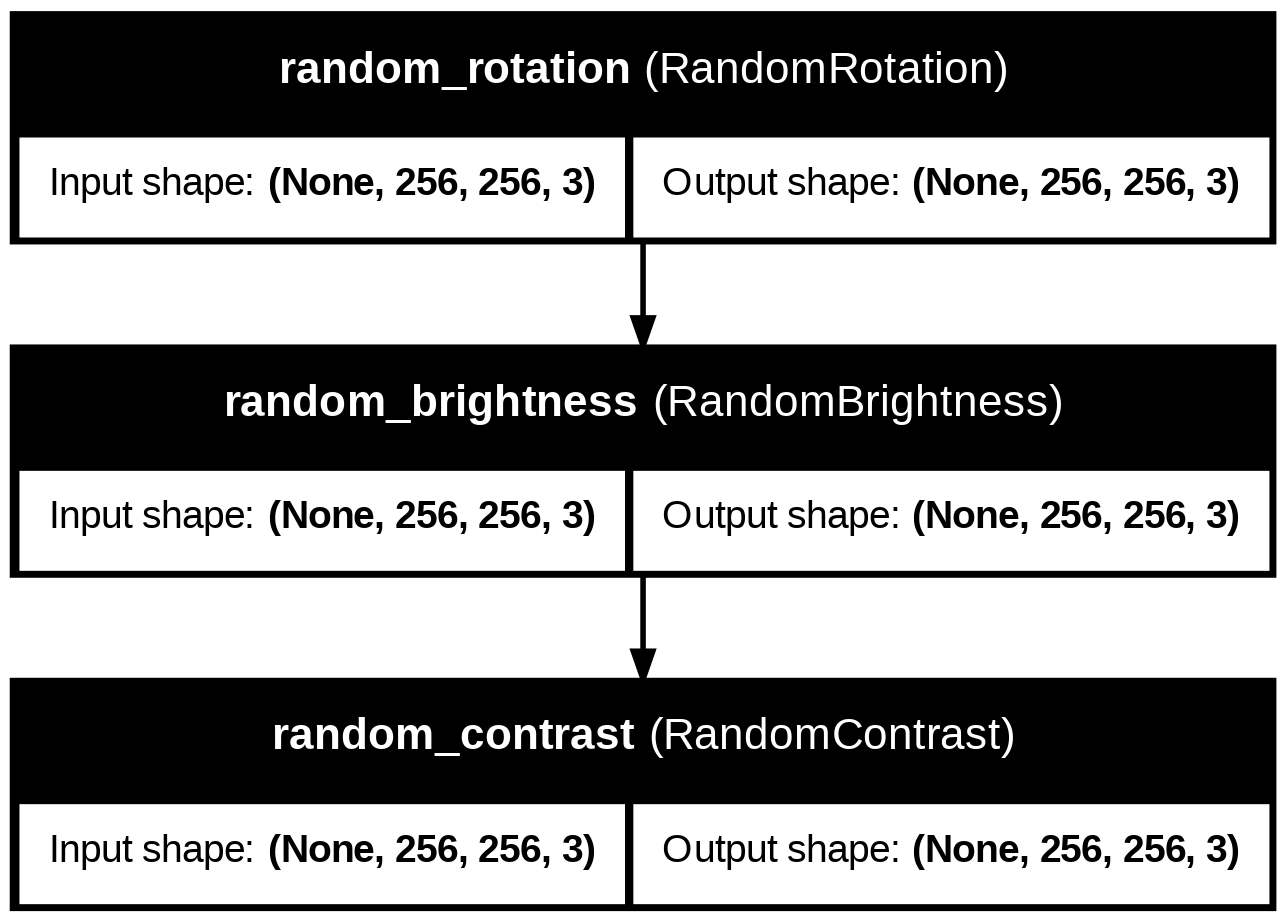

In [ ]:
augmentation.build((None, 256, 256, 3)) # Building model
# Plotting model
tf.keras.utils.plot_model(augmentation,
                          show_shapes = True,
                          show_layer_names = True,
                          expand_nested = True)

In [ ]:
! du -sh /content/Project_Data/Images/test/ai/615.jpg

200K	/content/Project_Data/Images/test/ai/615.jpg


In [ ]:
# Initiating model on GPU
with strategy.scope():
    model = Sequential()

    model.add(augmentation) # Adding data augmentation pipeline to the model

    # Feature Learning Layers
    model.add(Conv2D(32,                  # Number of filters/Kernels
                     (3,3),               # Size of kernels (3x3 matrix)
                     strides = 1,         # Step size for sliding the kernel across the input (1 pixel at a time).
                     padding = 'same',    # 'Same' ensures that the output feature map has the same dimensions as the input by padding zeros around the input.
                    input_shape = (256,256,3) # Input image shape
                    ))
    model.add(Activation('relu'))# Activation function
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (5,5), padding = 'same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
    model.add(Dropout(0.2))

    model.add(Conv2D(128, (3,3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
    model.add(Dropout(0.3))

    model.add(Conv2D(256, (5,5), padding = 'same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
    model.add(Dropout(0.3))

    model.add(Conv2D(512, (3,3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
    model.add(Dropout(0.3))

    # Flattening tensors
    model.add(Flatten())

    # Fully-Connected Layers
    model.add(Dense(2048))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    # Output Layer
    model.add(Dense(3, activation = 'softmax')) # Classification layer

In [ ]:
# Compiling model
model.compile(optimizer = tf.keras.optimizers.RMSprop(0.0001), # 1e-4
              loss = 'categorical_crossentropy', # Ideal for multiclass tasks
              metrics = ['accuracy']) # Evaluation metric